In [882]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import ROOT


In [883]:
def get_theta(eta):
    return 2*np.arctan(np.exp(-eta))
def get_eta(theta):
    return -np.log(np.tan(theta/2))


In [884]:
#first get the Moliere radius

In [918]:
import uproot as ur
events = ur.open('1.0_withhole_preHCAL/insert_sim_e-_5GeV_theta_178-178deg.edm4hep.root:events')
arrays_sim = events.arrays()
#print(arrays_sim.fields)
rMs=[]
for event in range(len(arrays_sim)):
    x=arrays_sim['BackwardsEcalInsertHits.position.x'][event,:]
    y=arrays_sim['BackwardsEcalInsertHits.position.y'][event,:]
    E=arrays_sim['BackwardsEcalInsertHits.energy'][event,:]
    if(sum(E)==0): continue
    x0=np.sum(x*E)/np.sum(E)
    y0=np.sum(y*E)/np.sum(E)
    r=np.hypot(x-x0, y-y0)
    for rM in np.linspace(0, np.max(r), 100):
        if np.sum(E*(r<rM))/np.sum(E)>.9:
            break
    #print(rM)
    rMs.append(rM)
print(f"moliere radius={np.mean(rMs):.1f}+-{np.std(rMs)/np.sqrt(len(rMs)):.1f} mm")

moliere radius=26.9+-1.3 mm


In [919]:
#next determine the resolutions on everything

In [920]:
def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

def Landau(x, normalization,location,stdev):
    #print(type(x))
    u=(x-location)*3.591/stdev/2.355
    renormalization = 1.64872*normalization
    return renormalization * np.exp(-u/2 - np.exp(-u)/2)

In [921]:
(-176+178.875)//.125+1

24.0

In [970]:
import uproot as ur
arrays={}
for E in 0.9, 2, 5, 10, 18:
    theta=178
    events = ur.open(f'1.0_withhole_preHCAL/insert_reco_e-_{E}GeV_theta_{theta}-{theta}deg.edm4hep.root:events')
    arrays[(E,theta)] = events.arrays()

for theta in np.linspace(176, 178.875, 24):
    E=5
    events = ur.open(f'hole_fix_preHCAL/insert_reco_e-_{E}GeV_theta_{theta:.3f}-{theta:.3f}deg.edm4hep.root:events')
    arrays[(E,theta)] = events.arrays()
for theta in 178.775, 178.800, 178.825, 178.850:
    E=5
    events = ur.open(f'hole_fix_preHCAL/insert_reco_e-_{E}GeV_theta_{theta:.3f}-{theta:.3f}deg.edm4hep.root:events')
    arrays[(E,theta)] = events.arrays()

In [971]:
print(np.max(arrays[(18,178)]['BackwardsEcalInsertHitsReco.energy']))

0.071614586


In [972]:
import os
try:
    os.mkdir("images")
except:
    pass

In [973]:
#CALICE data
csvString="""
x,y
0.177578,2.50831
0.184753,2.59382
0.226009,3.04988
0.260090,3.53444
0.292377,3.70546
0.356951,4.44656
0.502242,6.21378
0.708520,9.03563
0.175785,2.82185
0.182960,2.87886
0.226009,3.33492
0.260090,3.84798
0.290583,4.01900
0.355157,4.76010
0.500448,6.52732
0.708520,9.32067"""
from io import StringIO
csvStringIO = StringIO(csvString)
df = pd.read_csv(csvStringIO, sep=",")
E=list(1/(df.x[:len(df)//2])**2)
res=list(df.y[:len(df)//2])
dres=list(df.y[len(df)//2:]-res)
df_CALICE= pd.DataFrame({"E": E, "res":res, "dres":dres})
print(df_CALICE.E)

0    31.711857
1    29.296585
2    19.577108
3    14.782663
4    11.698053
5     7.848430
6     3.964368
7     1.992030
Name: E, dtype: float64


sampling fraction=0.0323
chi2=5.121, ndof=9, pval=0.824


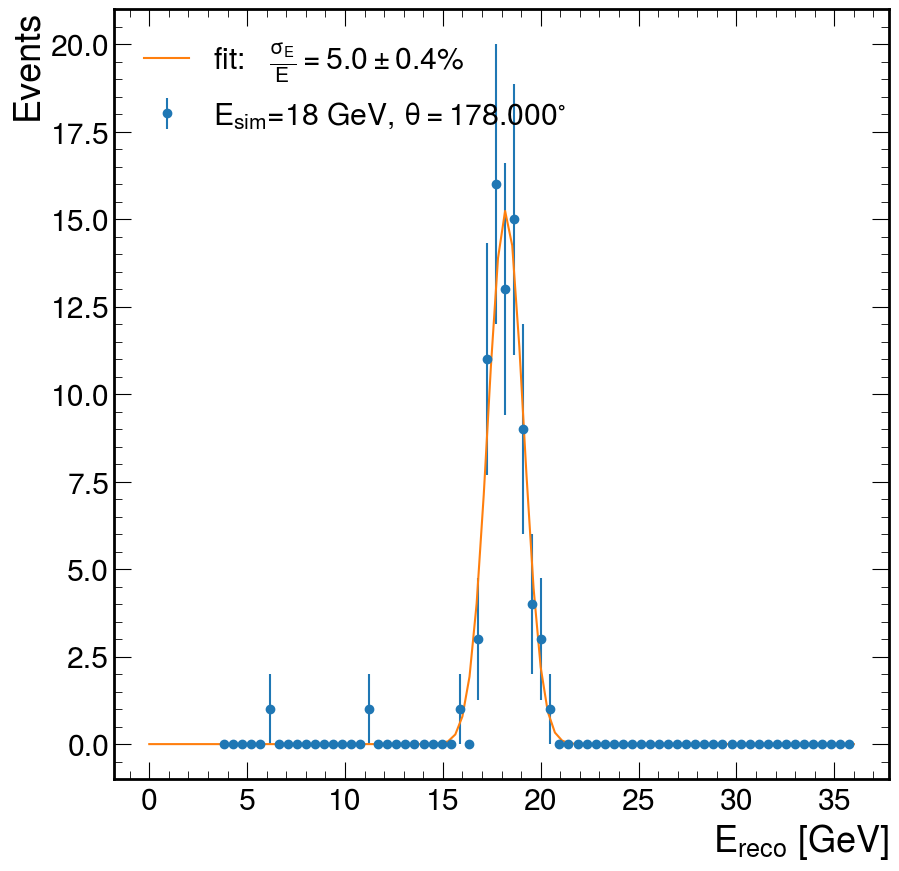

sampling fraction=0.0323
chi2=8.453, ndof=12, pval=0.749


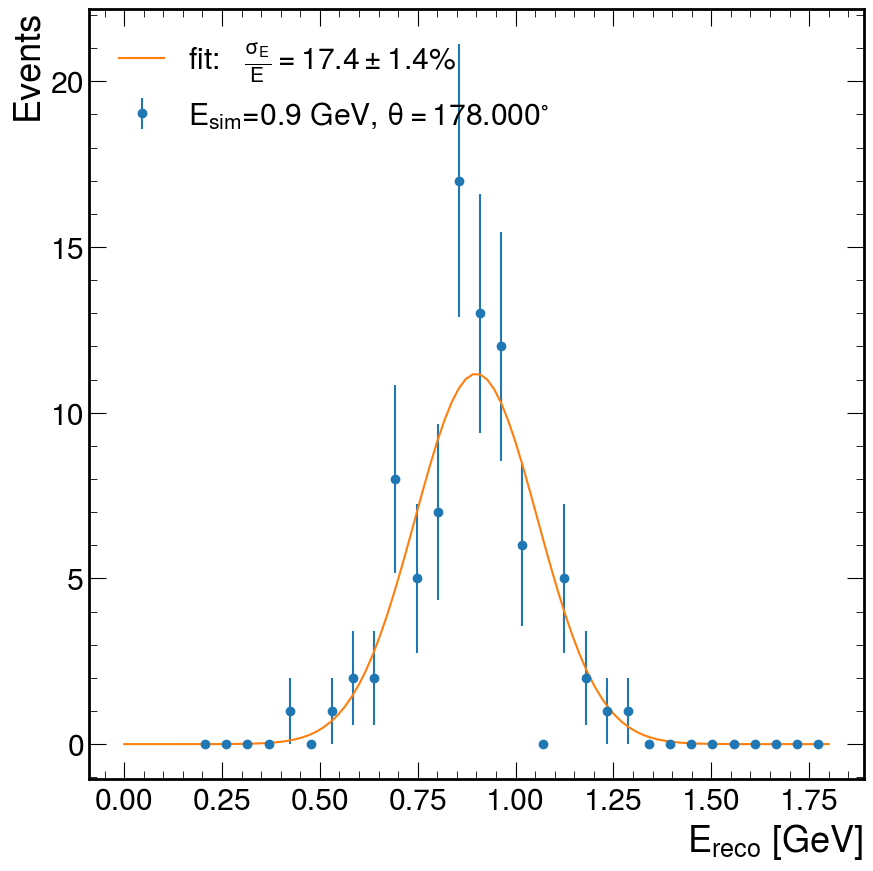

sampling fraction=0.0323
chi2=9.035, ndof=9, pval=0.434


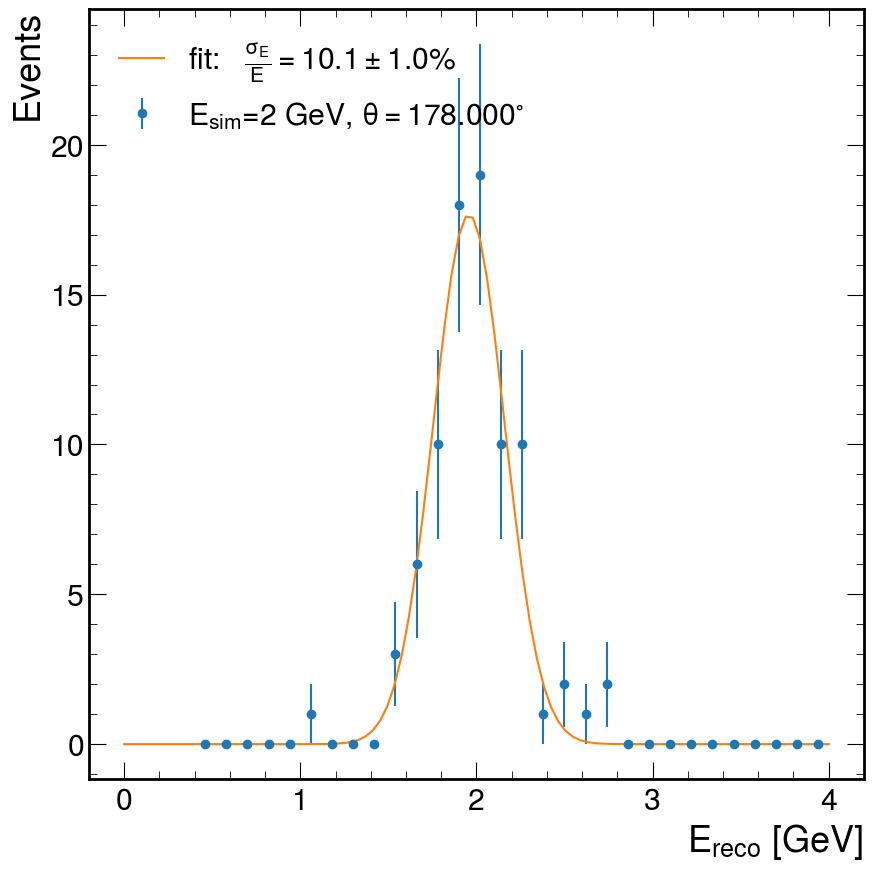

sampling fraction=0.0323
chi2=19.339, ndof=9, pval=0.0225


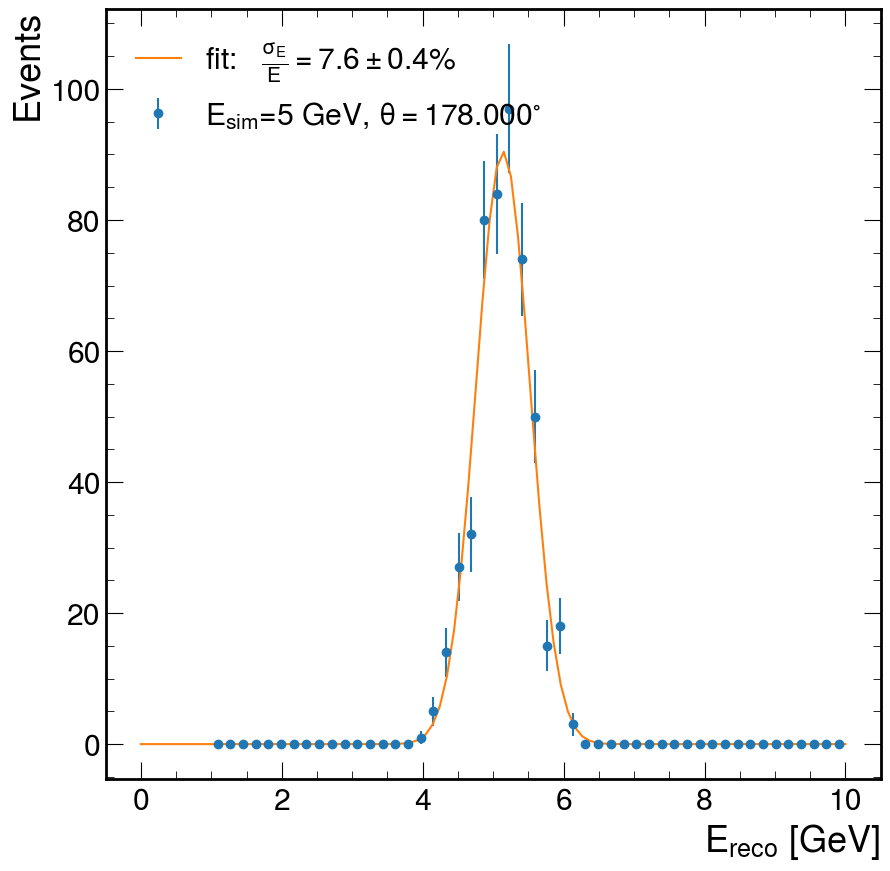

sampling fraction=0.0323
chi2=11.910, ndof=9, pval=0.218


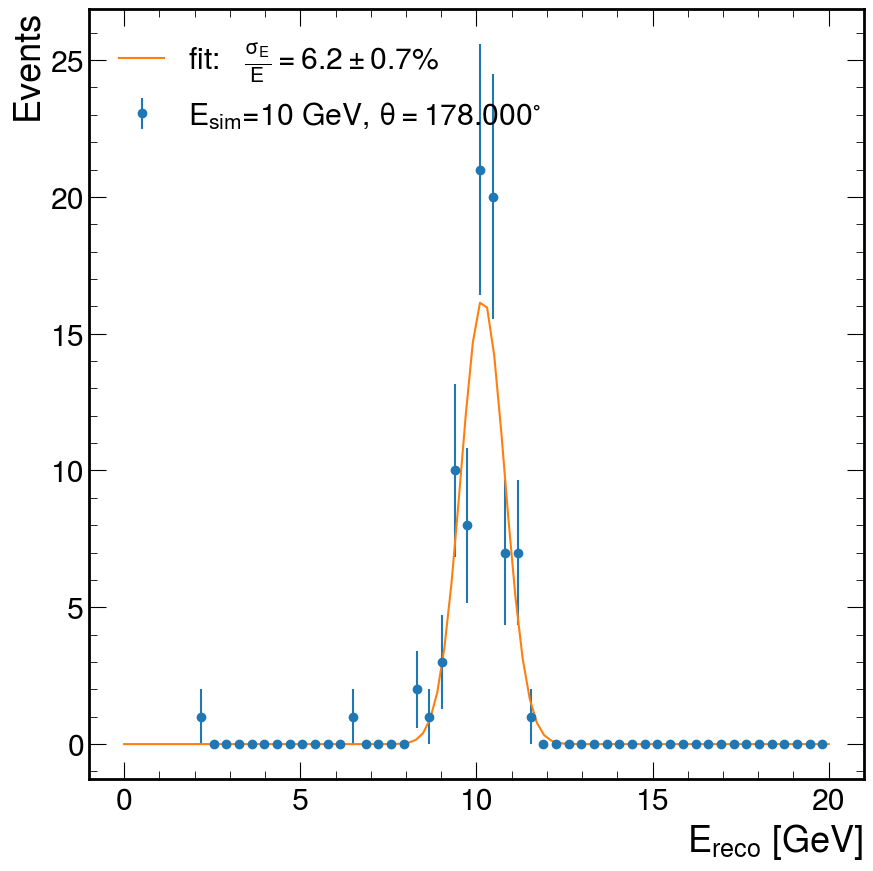

chi2=2.047, ndof=3, pval=0.563


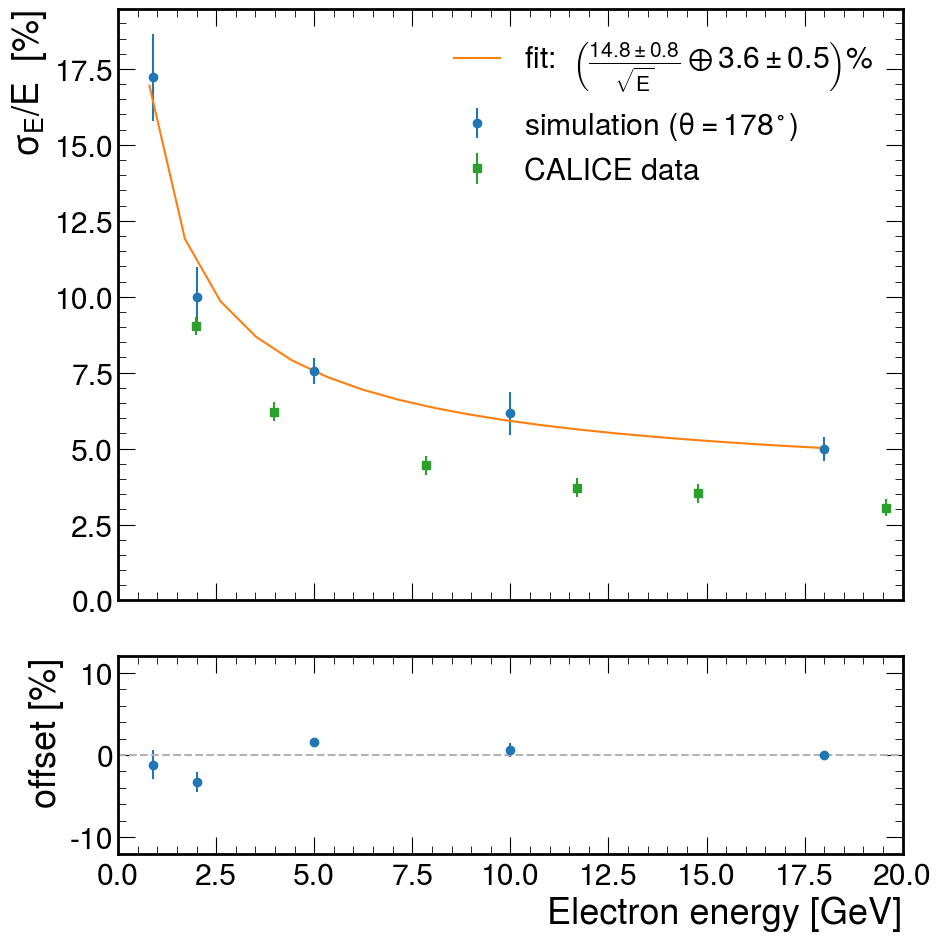

sampling fraction=0.0323
chi2=21.409, ndof=19, pval=0.315


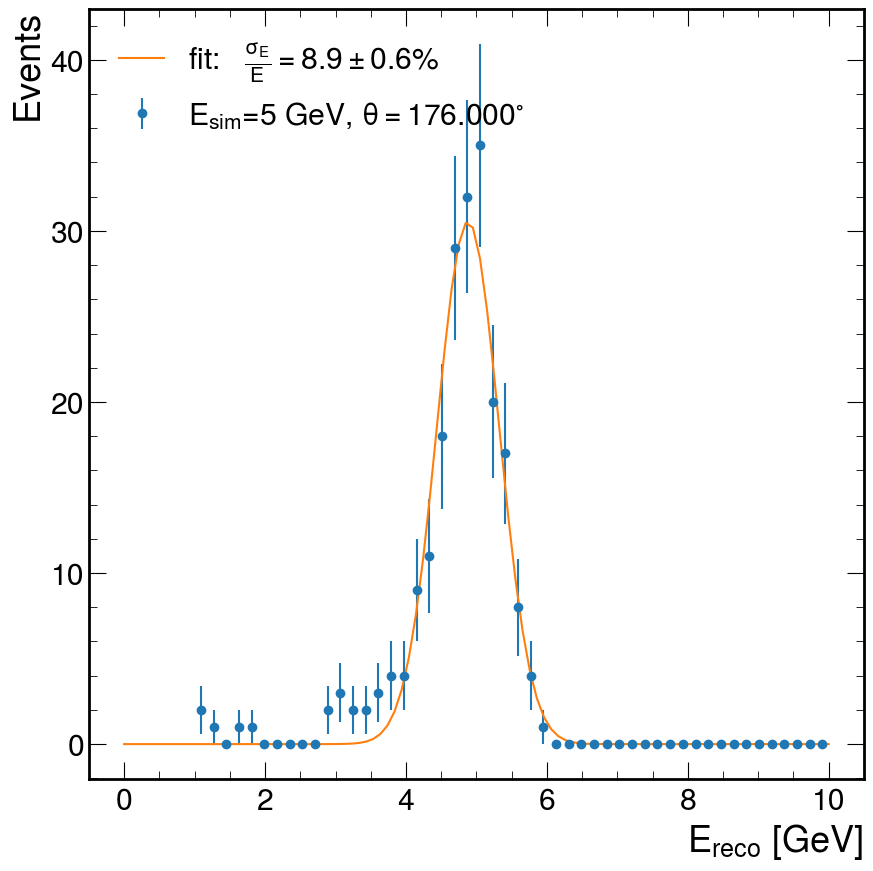

sampling fraction=0.0323
chi2=37.332, ndof=22, pval=0.0217


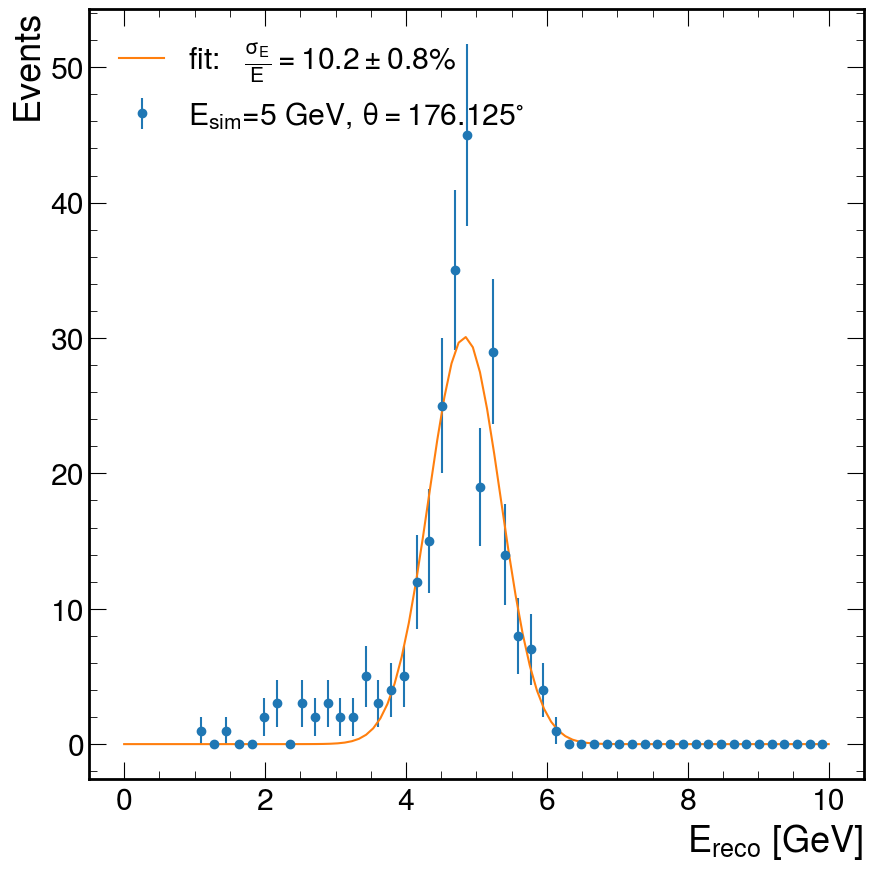

sampling fraction=0.0323
chi2=53.690, ndof=23, pval=0.000295


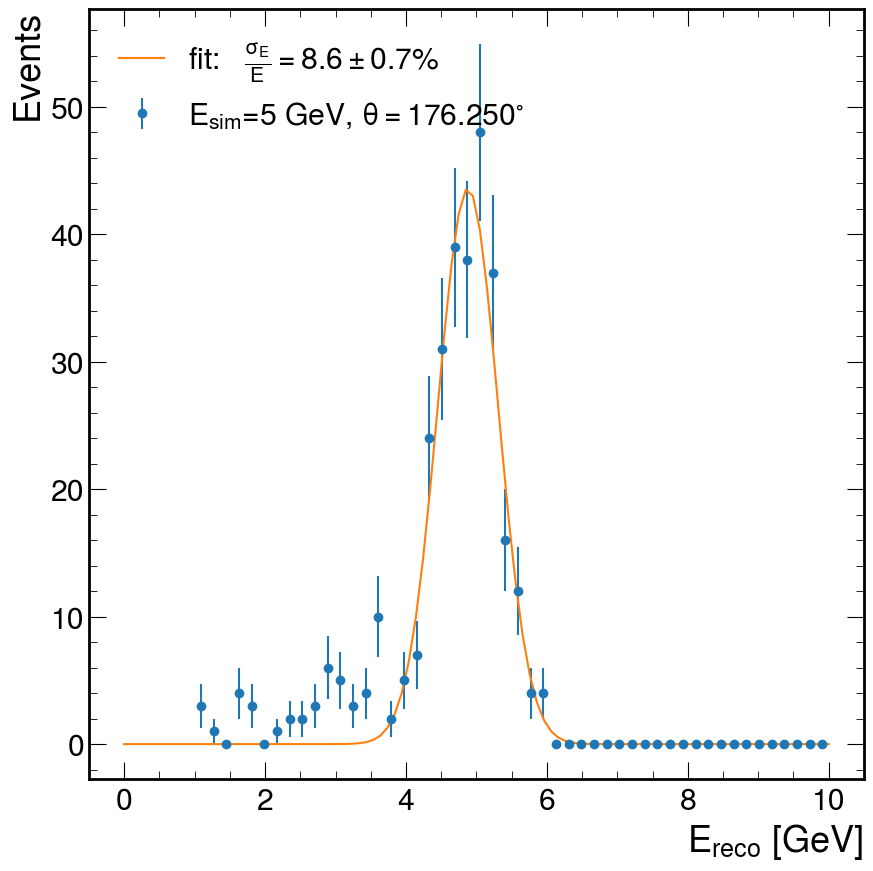

sampling fraction=0.0323
chi2=66.015, ndof=26, pval=2.48e-05


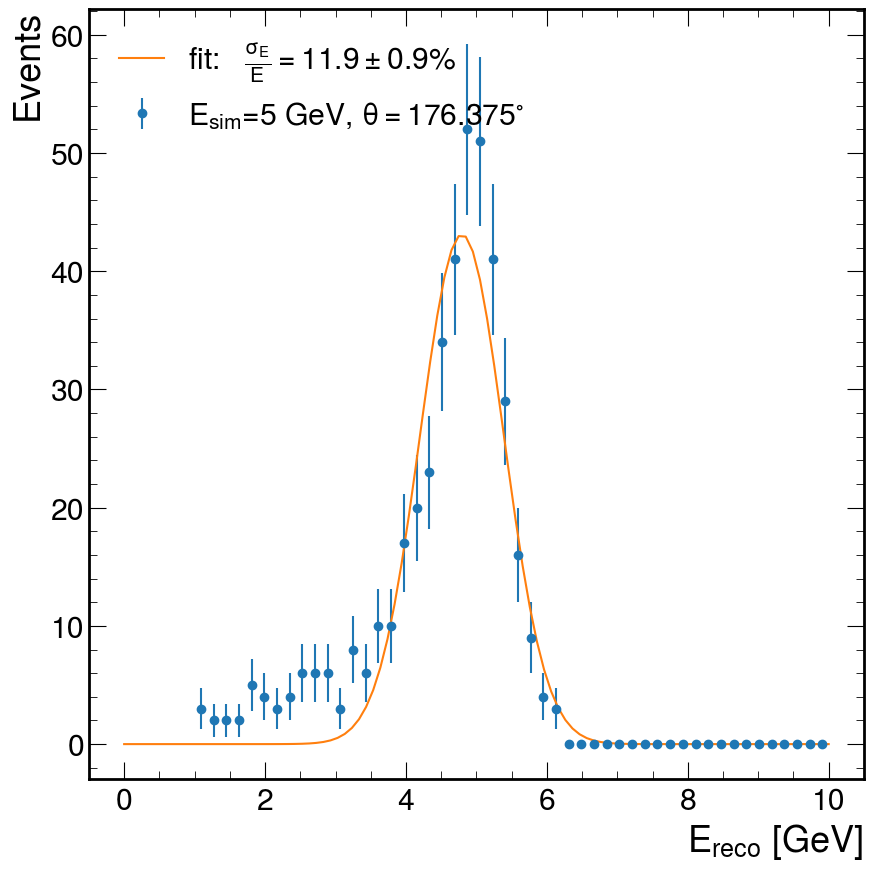

sampling fraction=0.0323
chi2=18.788, ndof=12, pval=0.0938


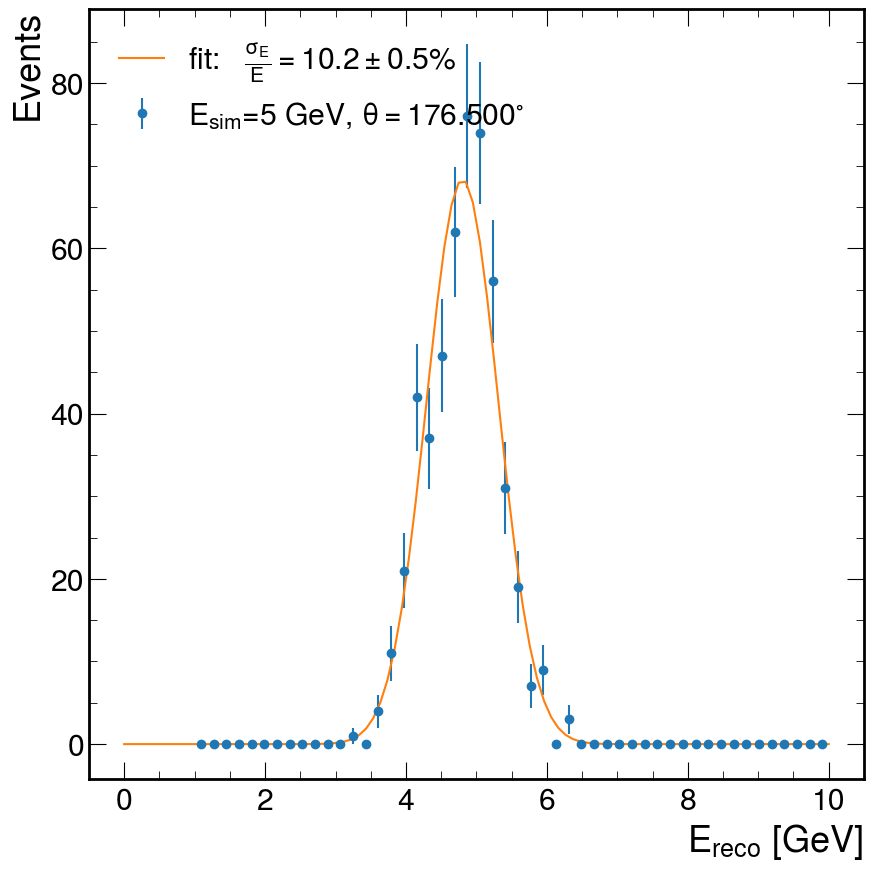

sampling fraction=0.0323
chi2=6.270, ndof=9, pval=0.713


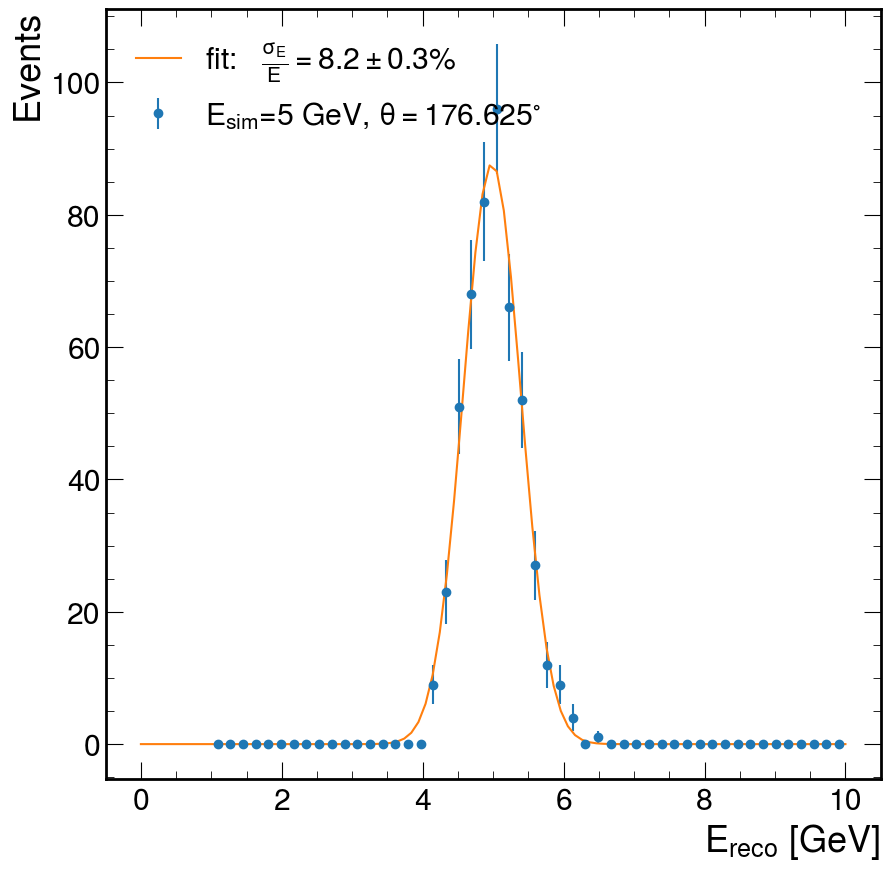

sampling fraction=0.0323
chi2=7.701, ndof=10, pval=0.658


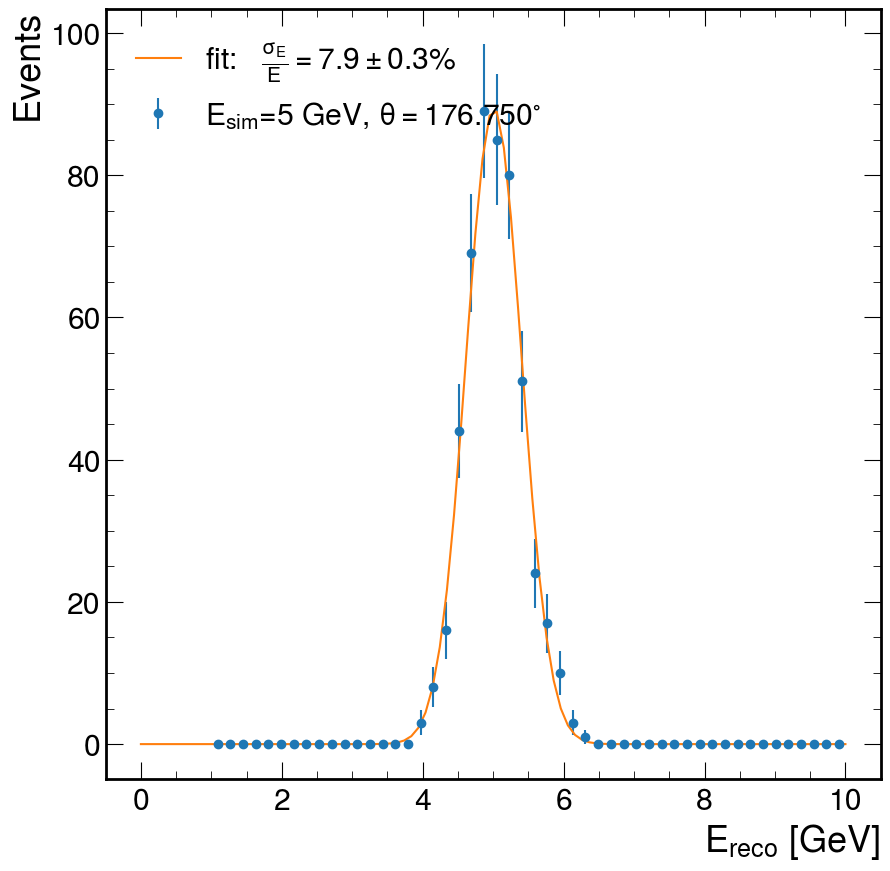

sampling fraction=0.0323
chi2=10.052, ndof=9, pval=0.346


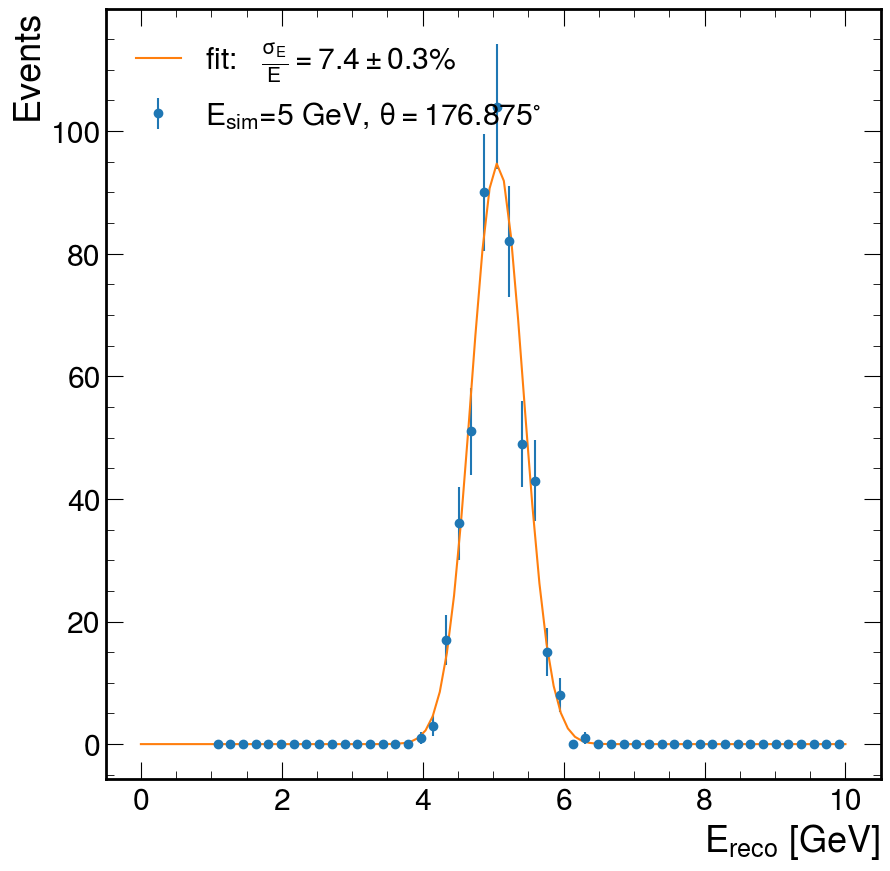

sampling fraction=0.0323
chi2=12.775, ndof=9, pval=0.173


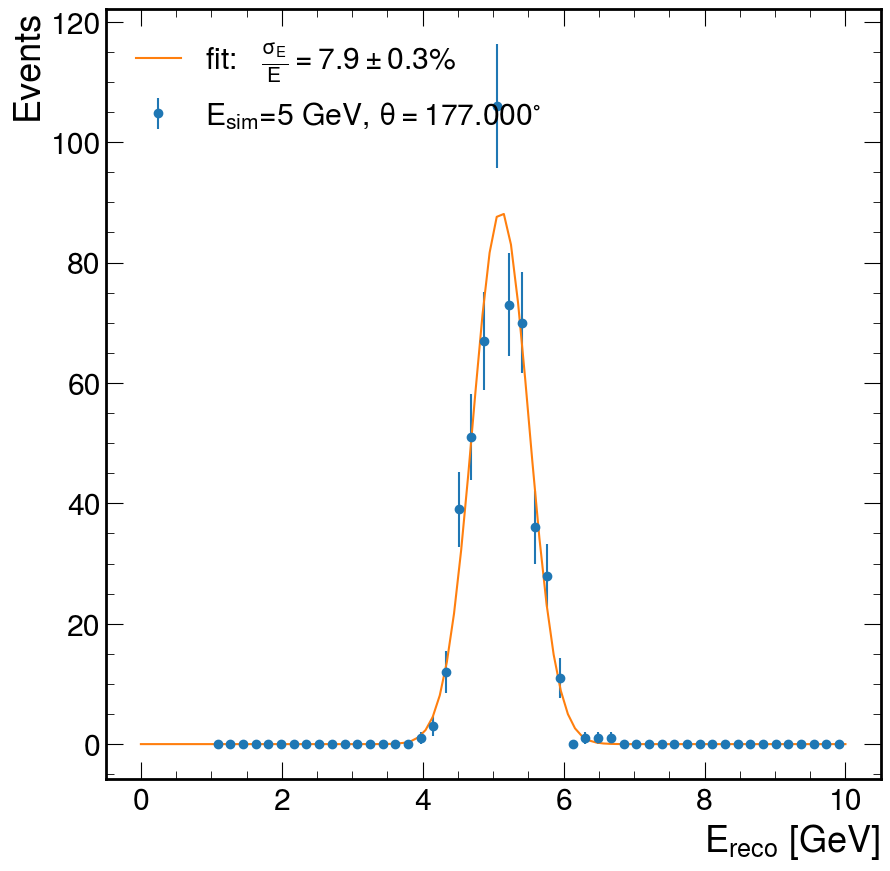

sampling fraction=0.0323
chi2=4.058, ndof=10, pval=0.945


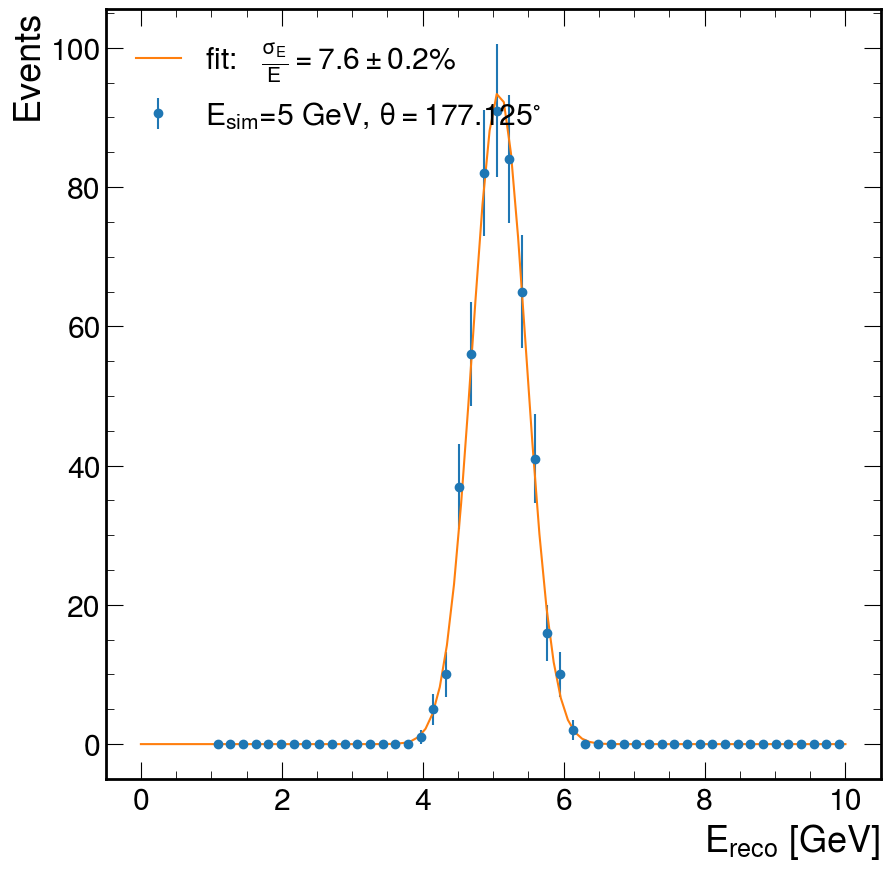

sampling fraction=0.0323
chi2=11.186, ndof=9, pval=0.263


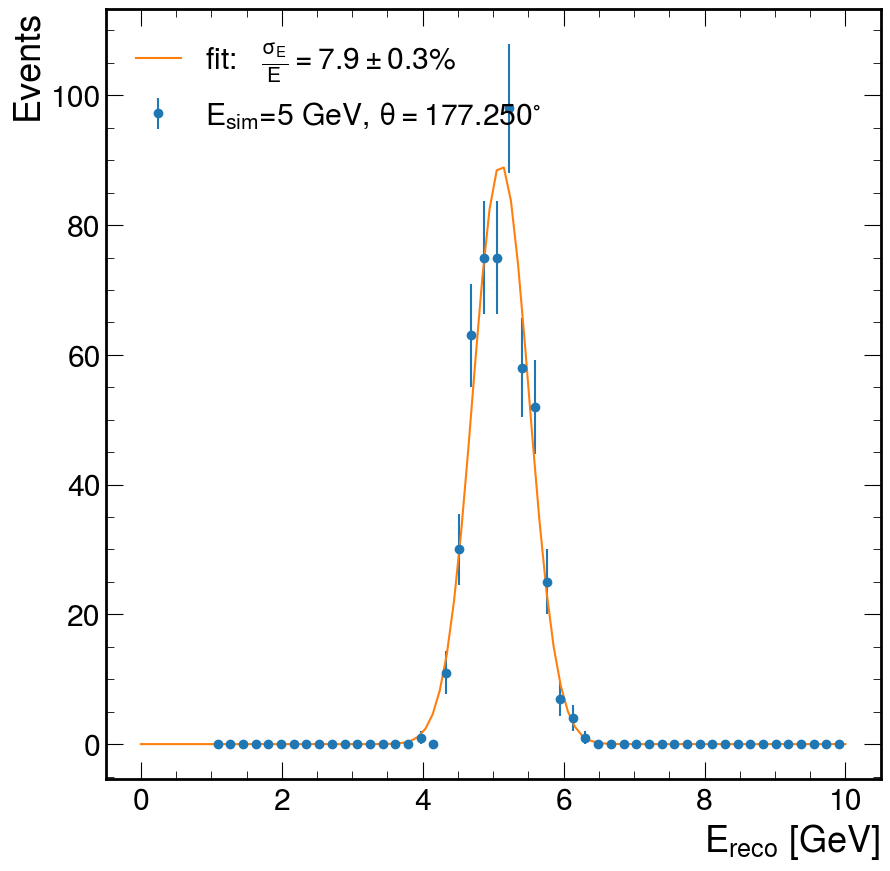

sampling fraction=0.0323
chi2=6.560, ndof=10, pval=0.766


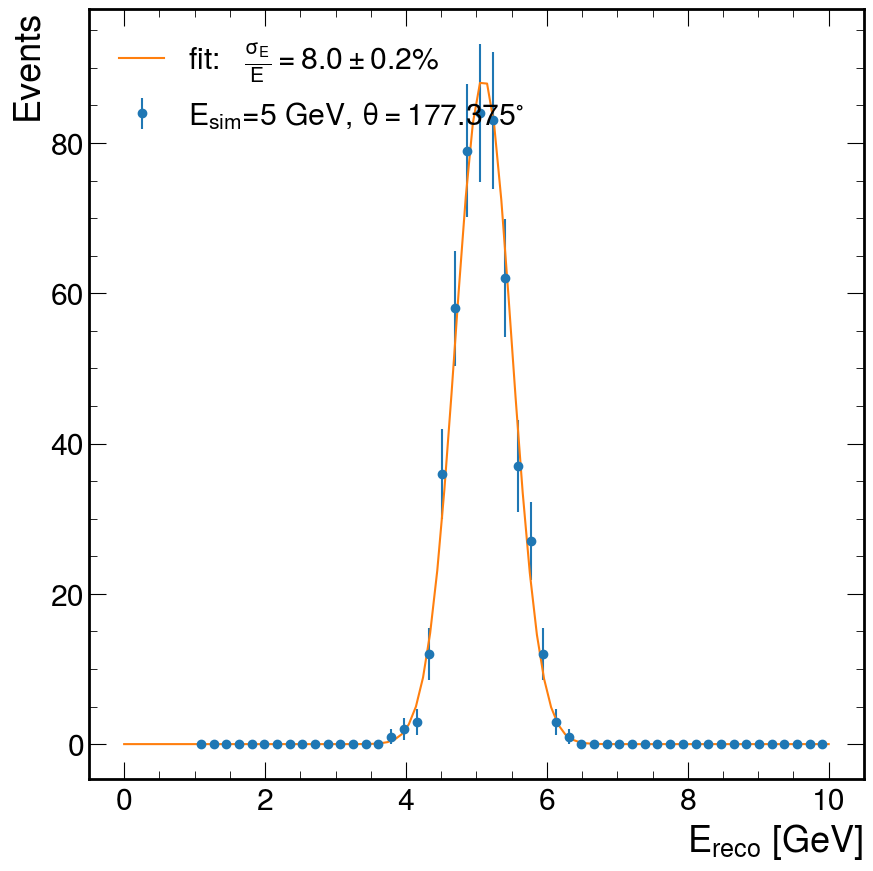

sampling fraction=0.0323
chi2=8.349, ndof=10, pval=0.595


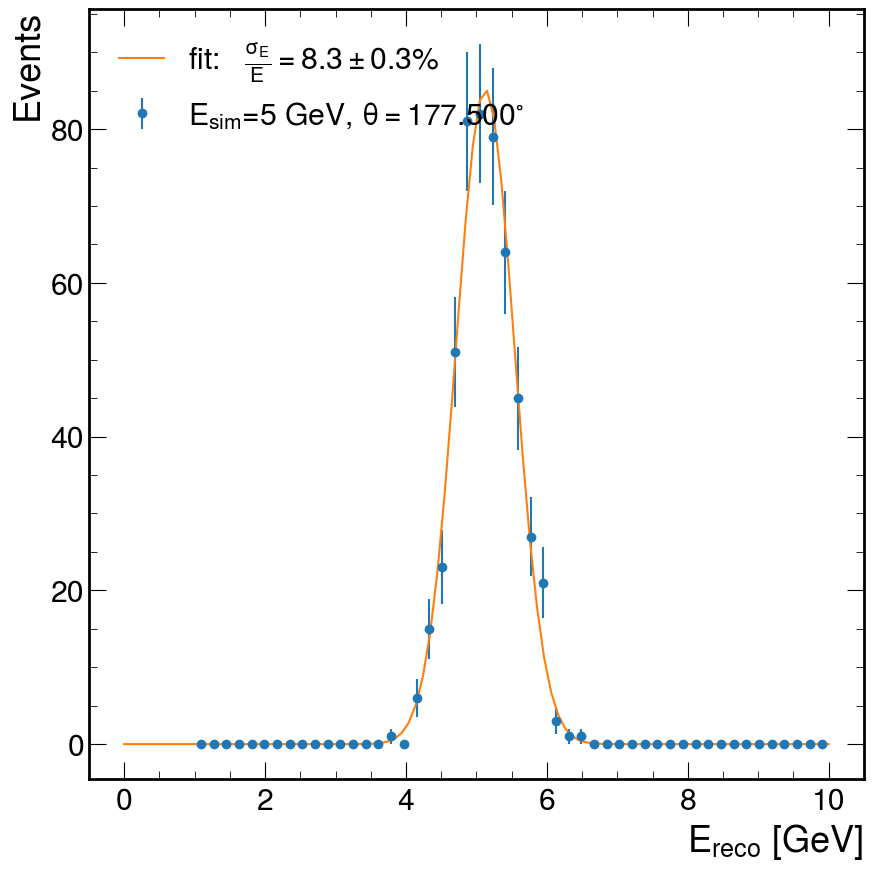

sampling fraction=0.0323
chi2=4.486, ndof=10, pval=0.923


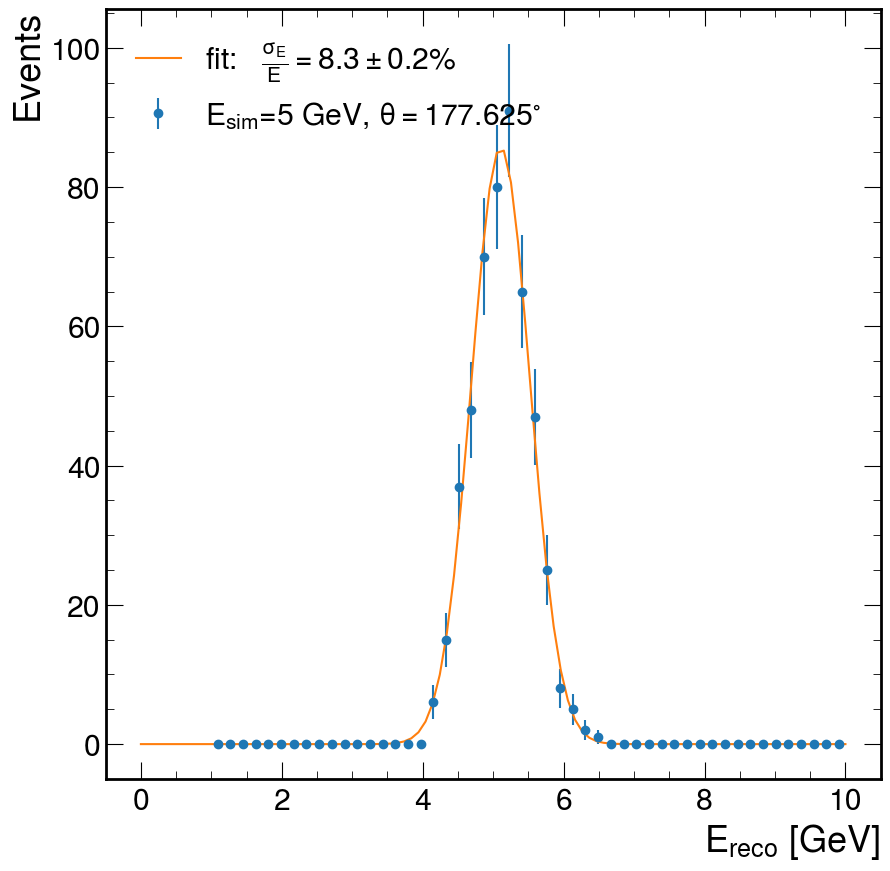

sampling fraction=0.0323
chi2=9.861, ndof=9, pval=0.362


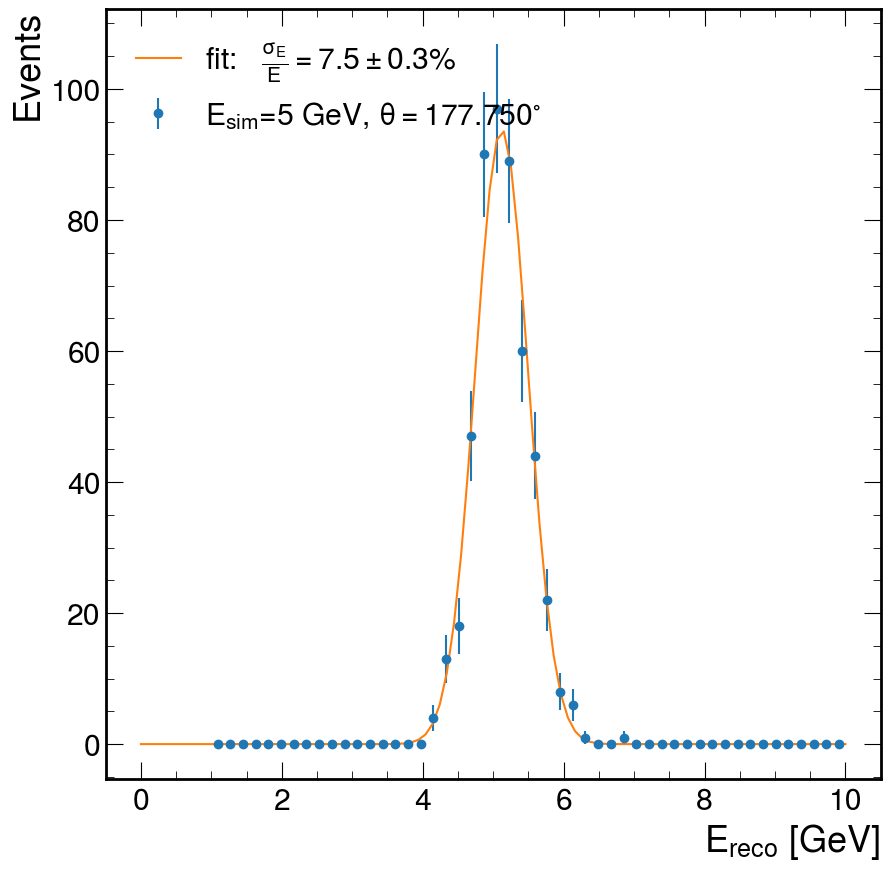

sampling fraction=0.0323
chi2=13.325, ndof=10, pval=0.206


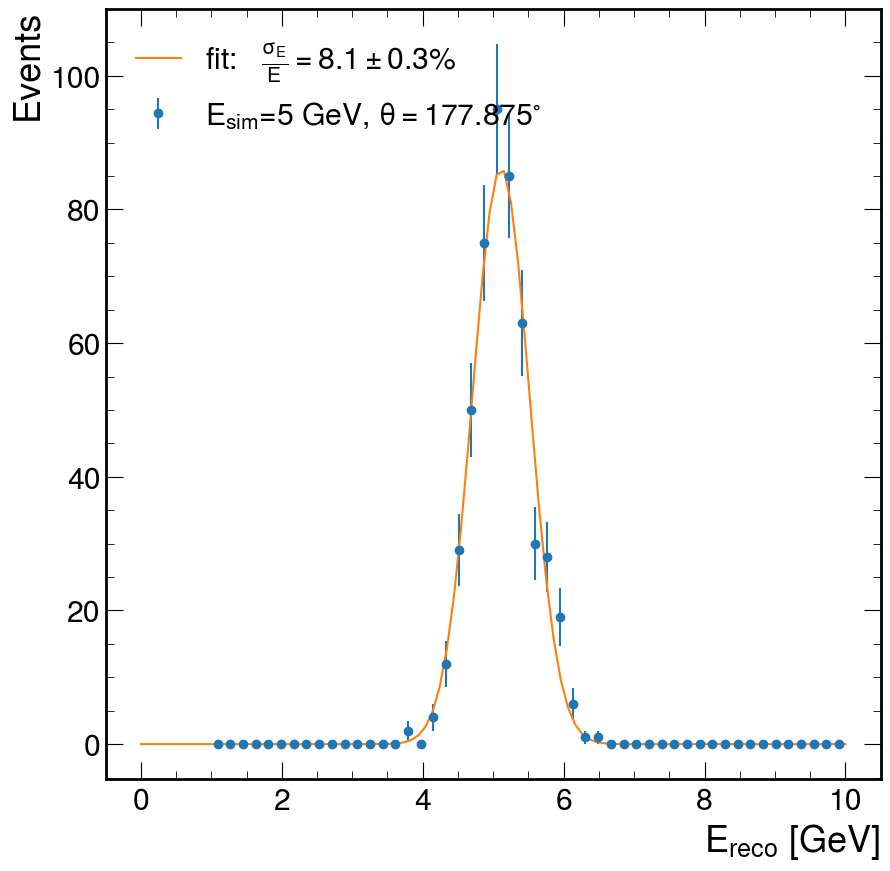

sampling fraction=0.0323
chi2=19.339, ndof=9, pval=0.0225


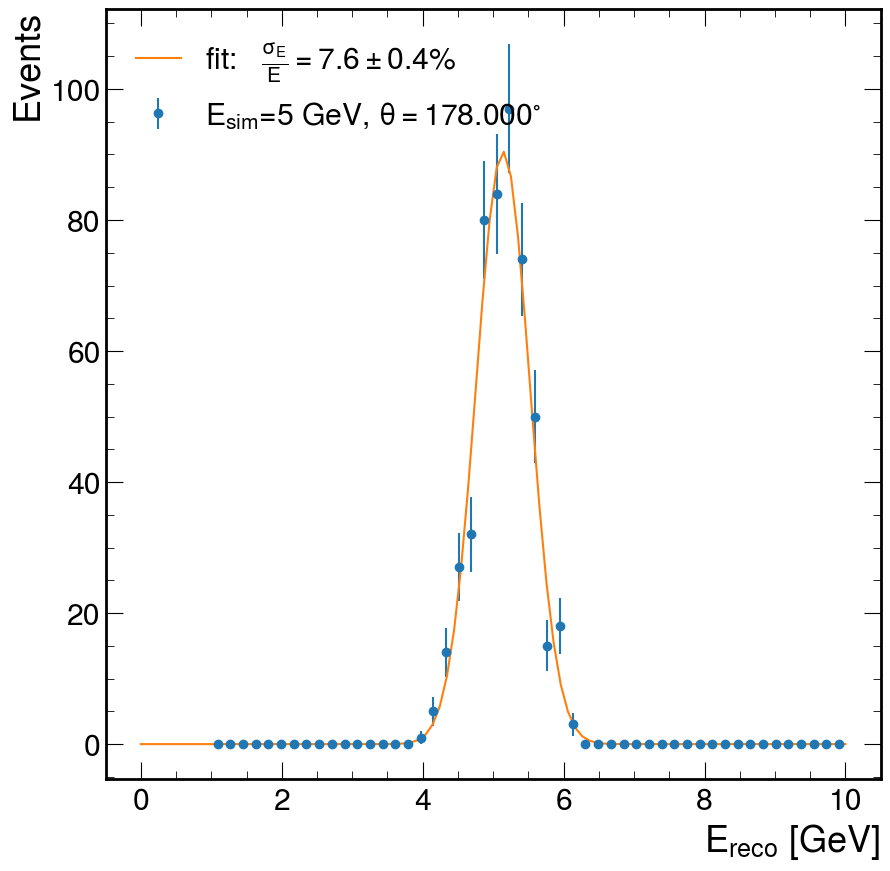

sampling fraction=0.0323
chi2=24.467, ndof=11, pval=0.0109


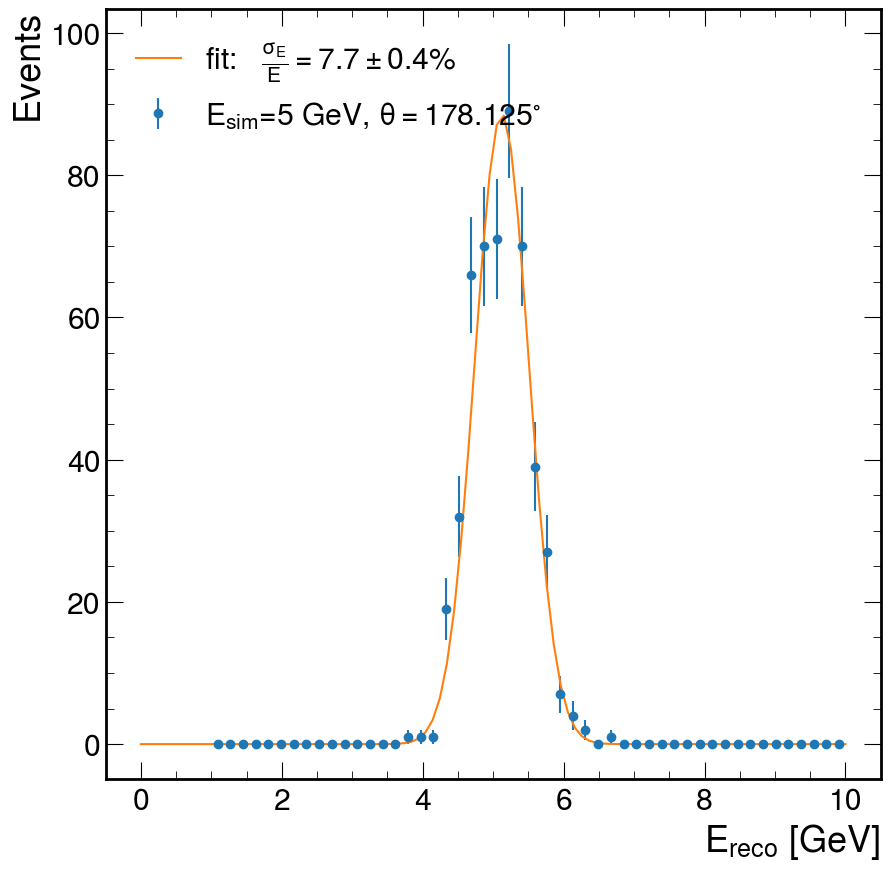

sampling fraction=0.0323
chi2=7.989, ndof=9, pval=0.535


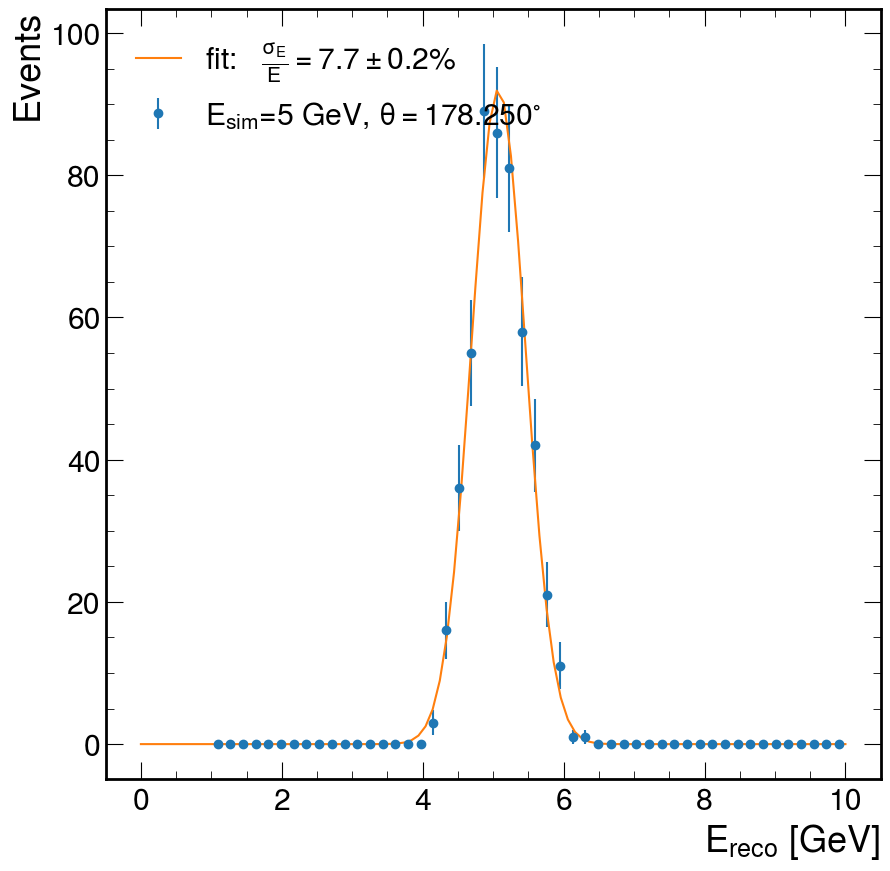

sampling fraction=0.0323
chi2=16.413, ndof=10, pval=0.0884


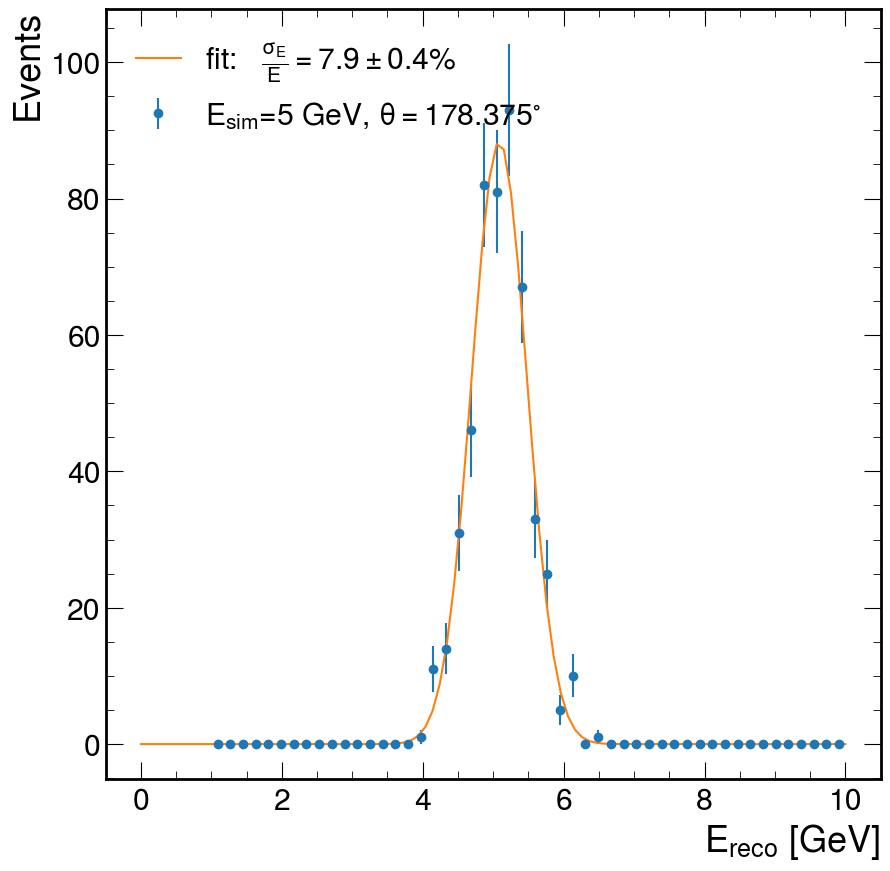

sampling fraction=0.0323
chi2=12.868, ndof=10, pval=0.231


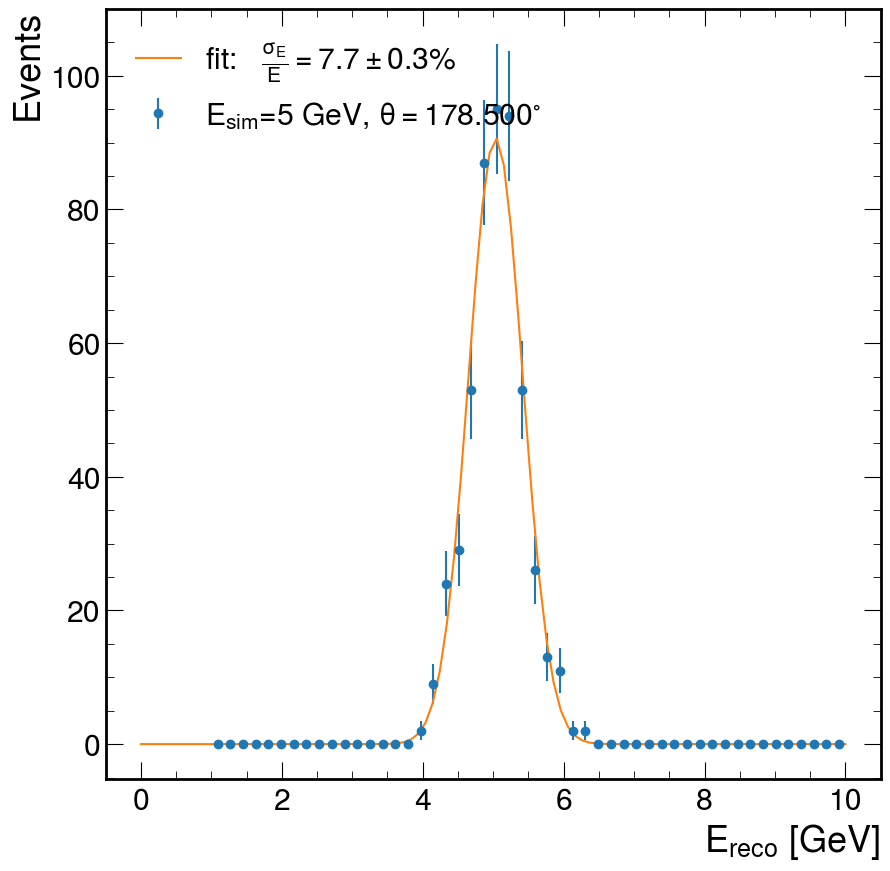

sampling fraction=0.0323
chi2=12.028, ndof=9, pval=0.212


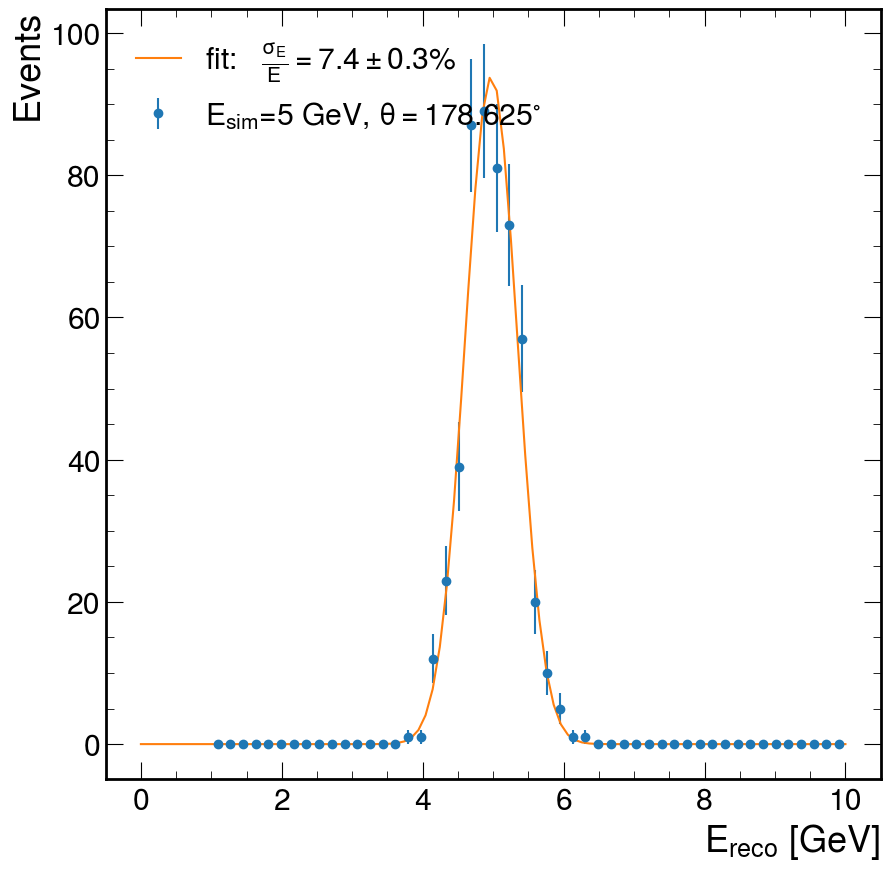

sampling fraction=0.0323
chi2=16.891, ndof=10, pval=0.0768


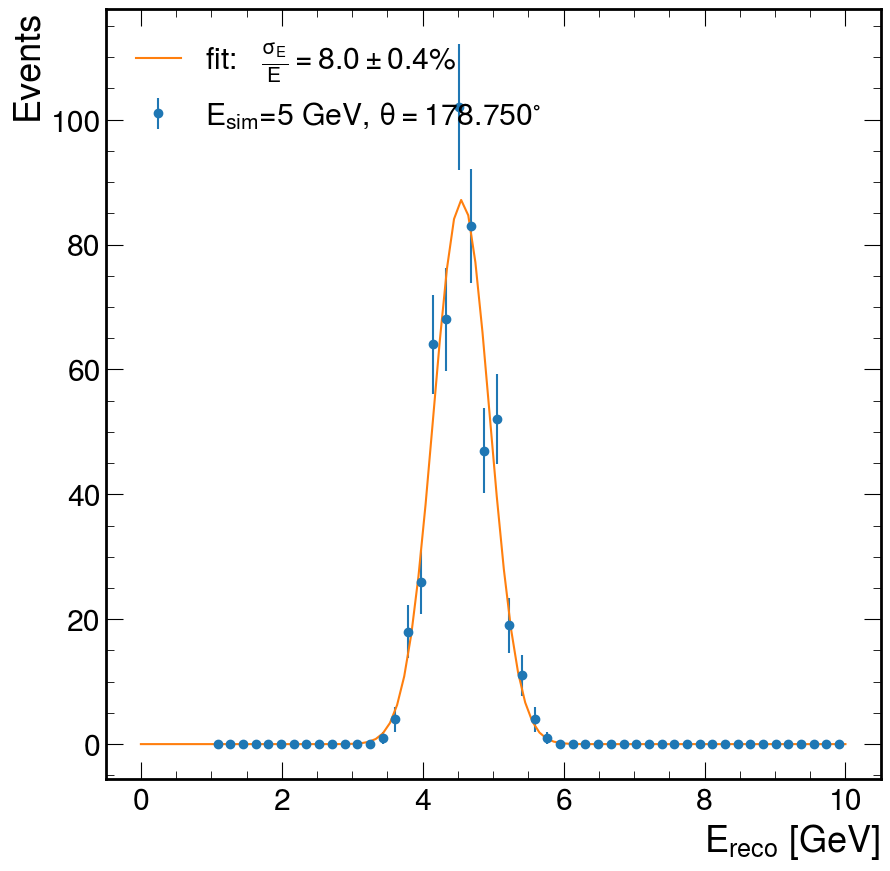

sampling fraction=0.0323
chi2=11.621, ndof=13, pval=0.559


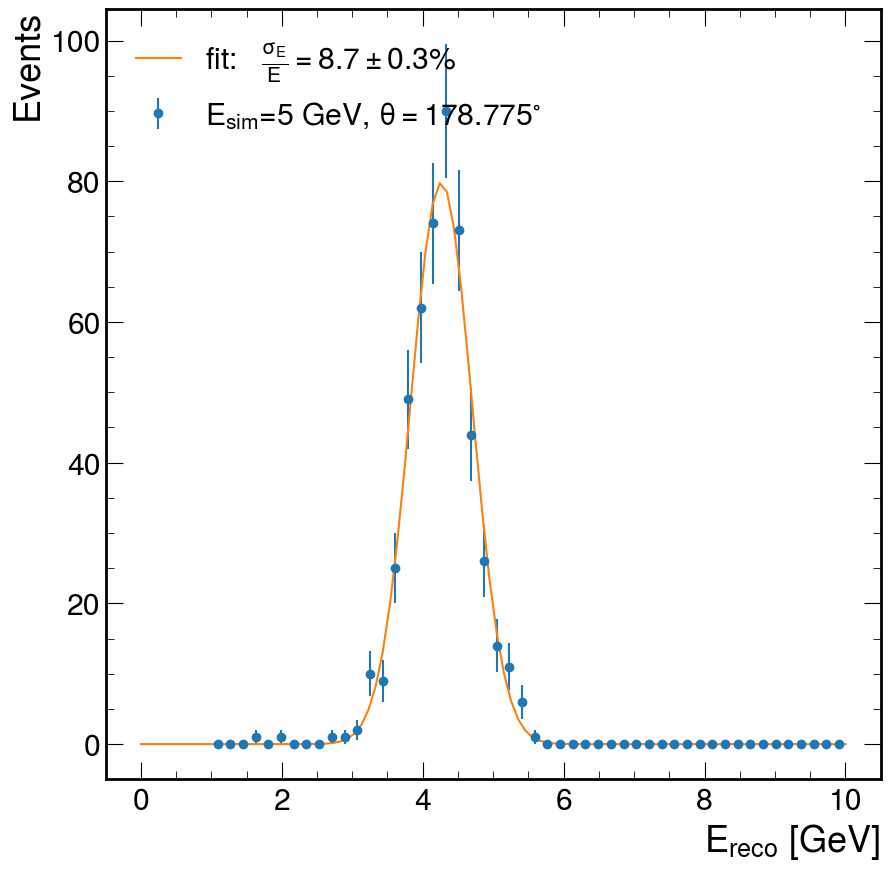

sampling fraction=0.0323
chi2=28.393, ndof=19, pval=0.0762


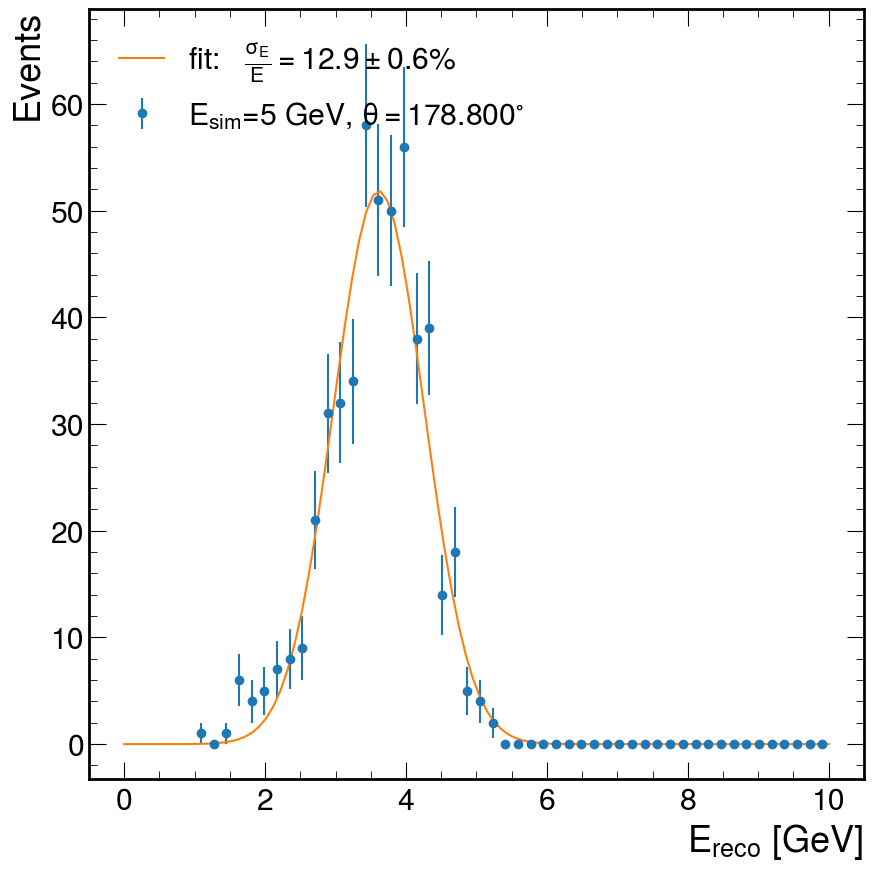

sampling fraction=0.0323
chi2=76.876, ndof=19, pval=6.38e-09


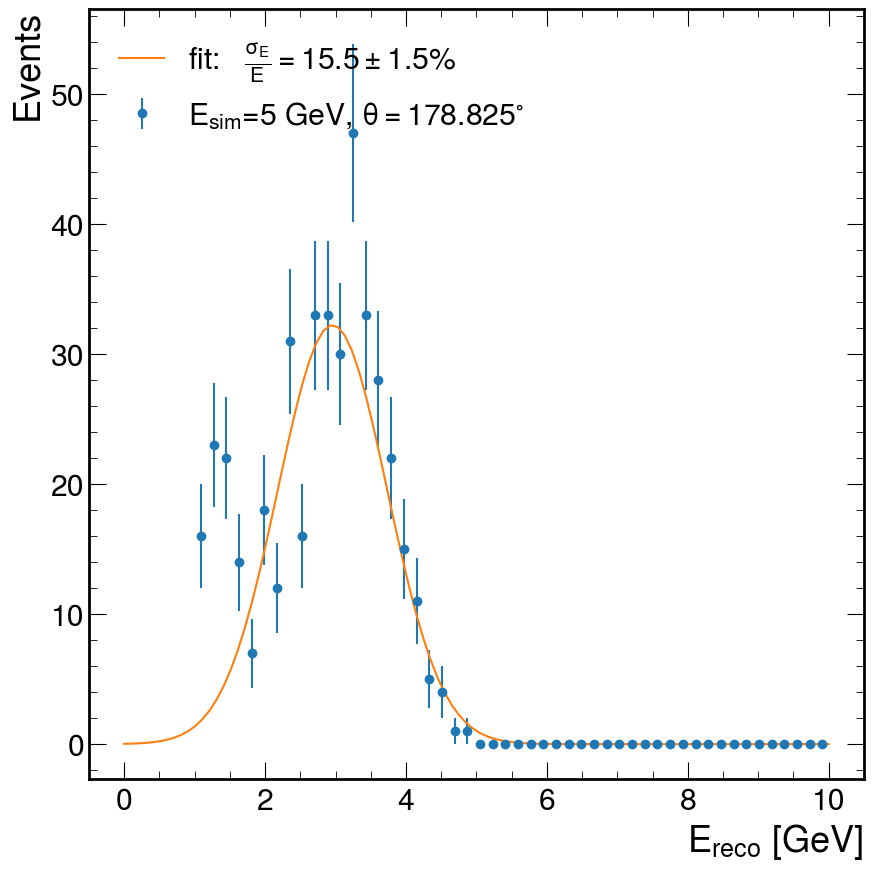

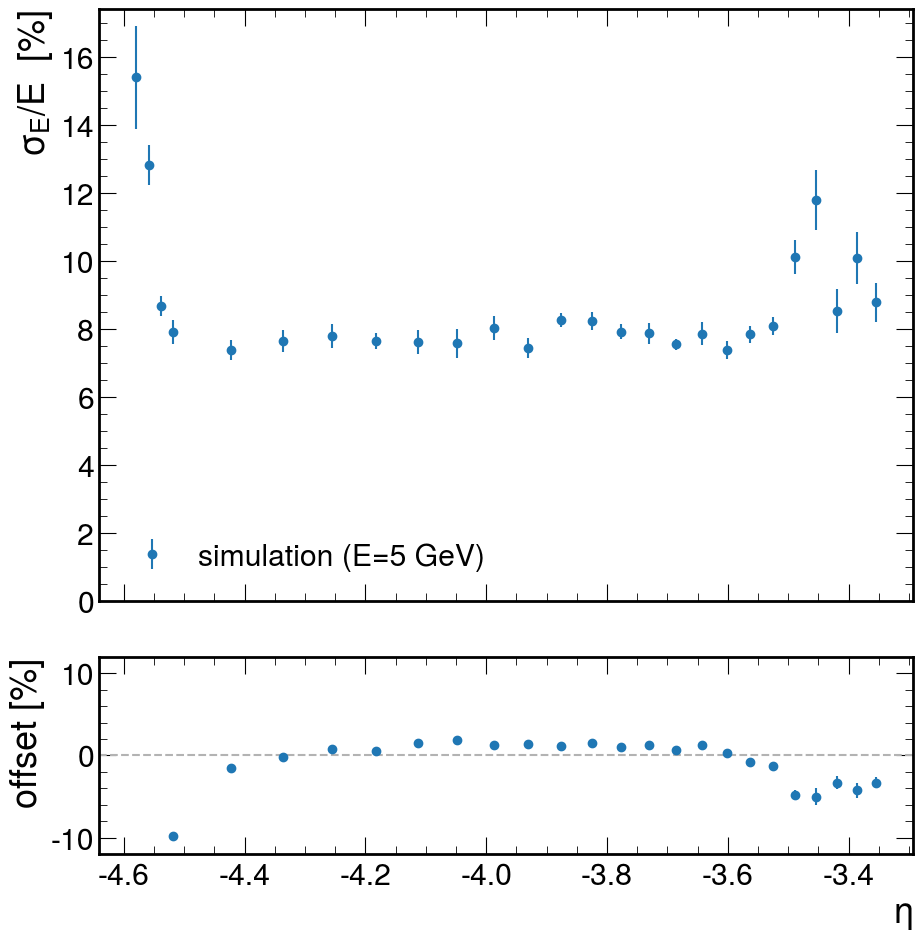

In [976]:
sf=None
for var in "E", "theta":
    Eresfracs=[]
    dEresfracs=[]
    
    mus=[]
    dmus=[]
    
    energies=  (18,0.9, 2, 5, 10) if var == "E" else (5,)
    
    #check all values of theta that have been simulated
    all_thetas=[]
    for key in arrays:
        if key[0]==5:
            
            all_thetas.append(key[1])
    all_thetas=np.array(sorted(all_thetas))[:-2]
    
    thetas= all_thetas if var == "theta" else (178,)
    Esums={}

    for theta in thetas:
    
        for E in energies:

            fnc=gauss
            Esums[E]=[]
            for event in range(len(arrays[(E,theta)])):
                Esum=np.sum(arrays[(E,theta)]['BackwardsEcalInsertHitsReco.energy'][event,:])
                #print(Esum)
                MC_E=np.sqrt(sum(arrays[(E,theta)][f"MCParticles.momentum.{a}"][event,2]**2 for a in "xyz"))
                #print(MC_E)
                Esums[E].append(Esum)

            Esums[E]=np.array(Esums[E])
            if sf==None:
                sf=np.mean(Esums[E][Esums[E]>0.1*np.mean(Esums[E])])/E
            print(f"sampling fraction={sf:.4f}")
            Ereco=Esums[E]/sf
            #print(Ereco)
            #print(sf)
            h,x=np.histogram(Ereco, bins=30 if E<5 else 50 if E<18 else 70, range=(0.2*E, 2*E))
            #print(h,x)
            bc=(x[1:]+x[:-1])/2
            p0=[E,np.mean(Ereco), np.std(Ereco)*.8]
            
            
            slc=(h>0) & (abs(bc-np.mean(Ereco))<3*np.std(Ereco))
            
            coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                     sigma=np.sqrt(h[slc]))
            plt.subplots(1,1)
            plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', label=f'$E_{{\\rm sim}}$={E} GeV, $\\theta={theta:.3f}^{{\\circ}}$')

            Eresfracs.append(coeff[2]/E)
            dEresfracs.append(np.sqrt(var_matrix[2][2])/E)

            mus.append(coeff[1]/E)
            dmus.append(np.sqrt(var_matrix[1][1])/E)
            
            x=np.linspace(0, 2*E, 100)
            plt.plot(x, fnc(x,*coeff), label=f"fit:   $\\frac{{\\sigma_E}}{{E}}={100*Eresfracs[-1]:.1f}\\pm {100*dEresfracs[-1]:.1f}\%$")
            chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
            ndof = len(bc[slc])-len(coeff)
            from scipy.stats import chi2 as c2
            print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")
            plt.xlabel("$E_{\\rm reco}$ [GeV]")
            plt.ylabel("Events")
            plt.legend(loc='upper left')
            plt.savefig(f"images/E_res_slice_{E}_GeV.pdf")
            plt.show()
            
    mus=np.array(mus)
    dmus=np.array(dmus)
    
    s=np.median(mus) #fit the mean to be 1.  This is equivalent to doing a calibration of sorts
    
    mus/=s
    dmus/=s
    
    Eresfracs=np.array(Eresfracs)/s
    dEresfracs=np.array(dEresfracs)/s

    fig,axs= plt.subplots(2,1, gridspec_kw=dict(height_ratios=[3,1]),sharex='all')
    plt.sca(axs[0])
    if var == "E":
        plt.errorbar(energies, Eresfracs*100, np.array(dEresfracs)*100, marker='o', ls='',label='simulation ($\\theta=178^\\circ$)')
        plt.xlim(0, 20)

        axs[1].set_xlabel("Electron energy [GeV]")
        
        from scipy.optimize import curve_fit
        p0=[0.17,0.1]
        fnc=lambda x, a,b: np.hypot(a/np.sqrt(x), b)
        coeff, var_matrix = curve_fit(fnc, energies, Eresfracs, p0=p0,
                                     sigma=dEresfracs)
        label=f'fit:  $\\left(\\frac{{{100*coeff[0]:.1f}\\pm {100*np.sqrt(var_matrix[0][0]):.1f}}}{{\\sqrt{{E}}}}'
        label+=f"\\oplus {100*coeff_E[1]:.1f}\\pm {100*np.sqrt(var_matrix[1][1]):.1f}\\right)\%$"

        if not var_matrix[0][0] < 100:
            p0=[0.17]
            fnc=lambda x, a: a/np.sqrt(x)
            coeff, var_matrix = curve_fit(fnc, energies, Eresfracs, p0=p0,
                                     sigma=dEresfracs)
            label=f'fit:  $\\frac{{{100*coeff_E[0]:.1f}\\pm {100*np.sqrt(var_matrix[0][0]):.1f}}}{{\\sqrt{{E}}}}$%'
        
        

        chi2=sum((fnc(energies,*coeff)-Eresfracs)**2/dEresfracs**2)
        ndof = len(energies)-len(coeff_E)
        from scipy.stats import chi2 as c2
        print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")

        x=np.linspace(0.8, 18, 20)

        plt.plot(x, 100*fnc(x, *coeff_E), label=label)
        axs[1].errorbar(energies, np.array(mus)*100-100, np.array(dmus)*100, marker='o', ls='')
        plt.errorbar(df_CALICE.E, df_CALICE.res, df_CALICE.dres, ls='', marker='s', label="CALICE data")
        
        #now cache this for later; the energy resolution as a function of E
        coeff_E=coeff
        
    else:
        plt.errorbar(get_eta(thetas*np.pi/180), Eresfracs*100, np.array(dEresfracs)*100, marker='o', 
                     ls='',label=f'simulation (E={energies[0]} GeV)')
        axs[1].errorbar(get_eta(thetas*np.pi/180), np.array(mus)*100-100, np.array(dmus)*100, marker='o', ls='')
        axs[1].set_xlabel("$\\eta$")

    axs[1].set_ylabel("offset [%]")

    axs[1].set_ylim(-12, 12)
    axs[1].axhline(0, ls='--', color='0.7')
    
    plt.ylabel("${\\sigma_E}/{E}$  [%]")
    plt.legend(loc= 'upper right' if var == 'E' else 'lower left')
    plt.ylim(0)
    plt.tight_layout()
    plt.savefig(f"images/E_res_vs_{var}.pdf")
    plt.show()

In [ ]:
#plt.hist2d(arrays[E]['BackwardsEcalInsertHitsReco.position.x'][0,:],arrays[E]['BackwardsEcalInsertHitsReco.position.z'][0,:],bins=100)
#plt.show()


In [ ]:
help(sorted)

chi2=1.903, ndof=4, pval=0.754


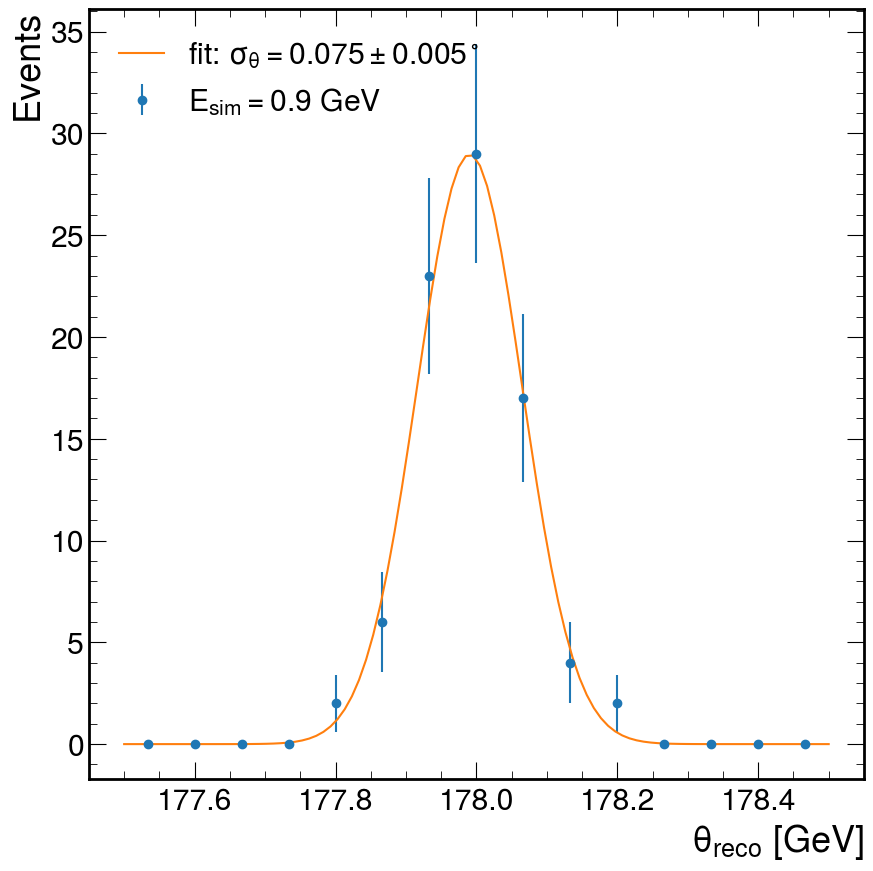

chi2=6.521, ndof=4, pval=0.163


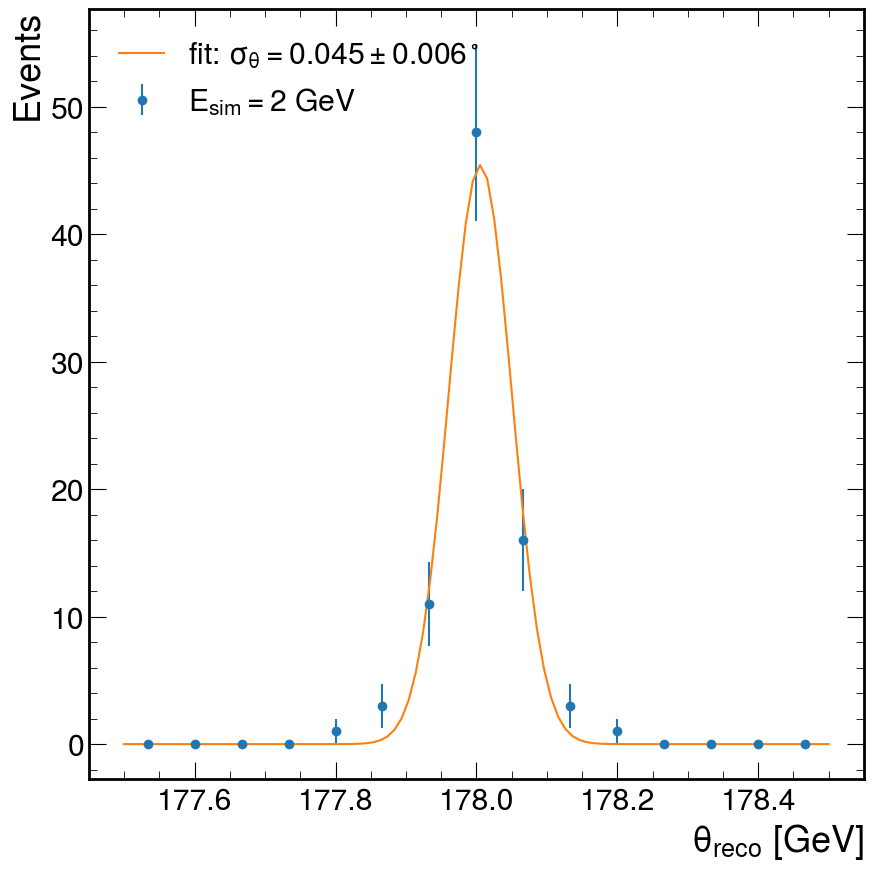

chi2=4.472, ndof=4, pval=0.346


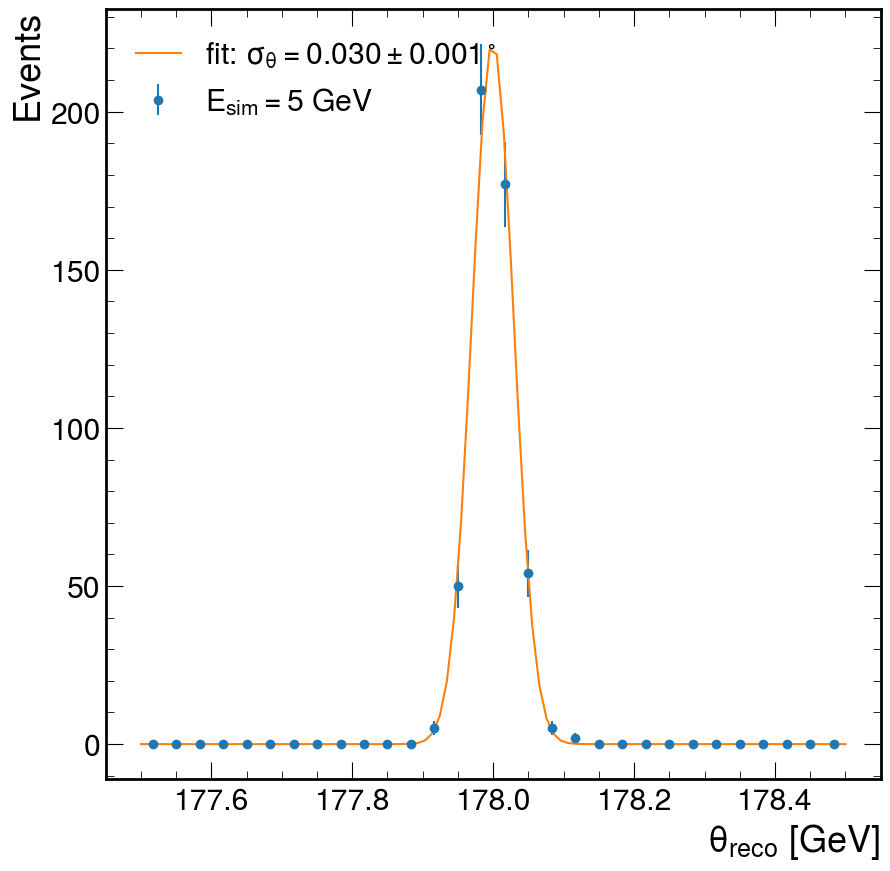

chi2=6.364, ndof=6, pval=0.384


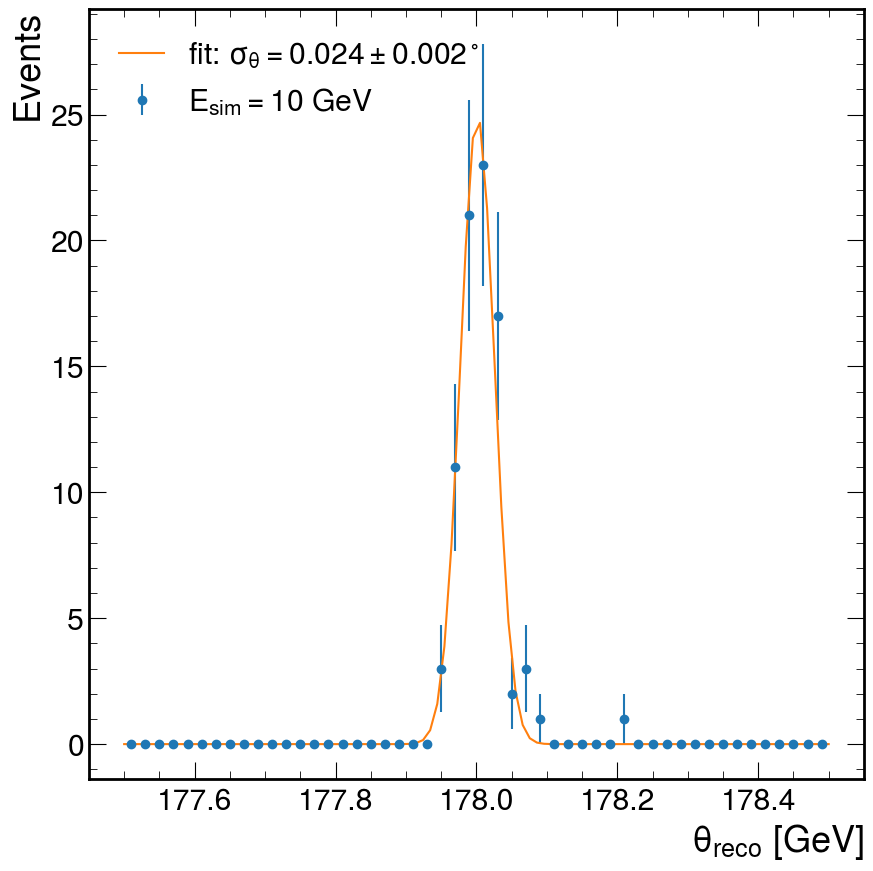

chi2=2.817, ndof=6, pval=0.831


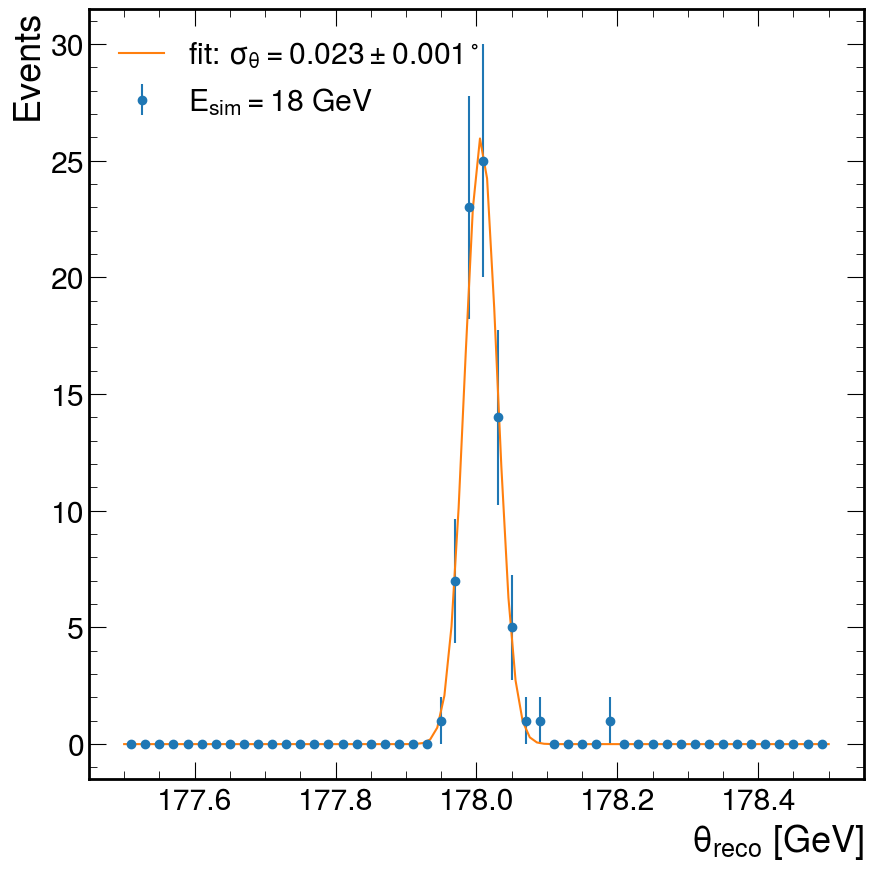

[0.00130136 0.0007811  0.00051779 0.00042428 0.00040321] [8.10446344e-05 9.73128760e-05 1.82417306e-05 3.99917617e-05
 2.43641746e-05]
chi2=7.9, ndof=3, pval=0.0476


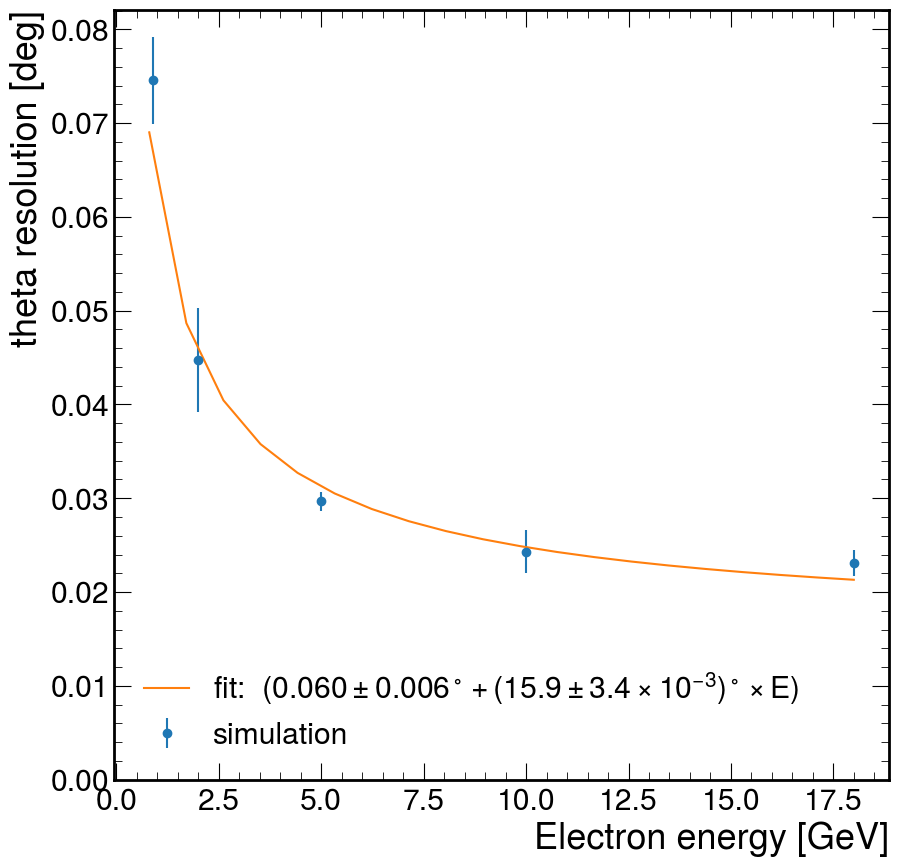

In [964]:
#get list of z positions of horizontal layers
aa=[]
for a in arrays[(18, 178)]['BackwardsEcalInsertHitsReco.position.z']:
    aa+=list(a)
zh=sorted(set(aa), reverse=True)[::2]

energies= 0.9,2, 5, 10, 18
thetares=[]
dthetares=[]

for E in energies:
    fnc=gauss
    dthetas=[]
    thetas=[]
    key=(E, 178)
    for event in range(len(arrays[key])):
        
        x=arrays[key]['BackwardsEcalInsertHitsReco.position.x'][event,:]
        y=arrays[key]['BackwardsEcalInsertHitsReco.position.y'][event,:]
        z=arrays[key]['BackwardsEcalInsertHitsReco.position.z'][event,:]
        Erecon=arrays[key]['BackwardsEcalInsertHitsReco.energy'][event,:]
        weights=Erecon

        isHLayer=np.array([z[i] in zh for i in range(len(z))])
        isVLayer=1-isHLayer

        #skip bad events (ie, ones where only V or only H layers are hit)
        if sum(Erecon*isVLayer) == 0 or sum(Erecon*isHLayer) == 0:
            continue

        x0=float(np.sum(x*Erecon*isVLayer)/np.sum(Erecon*isVLayer))
        y0=float(np.sum(y*Erecon*isHLayer)/np.sum(Erecon*isHLayer))
        #print(x0,y0)
        z0v=sum(z*Erecon*isVLayer)/np.sum(Erecon*isVLayer)
        z0h=sum(z*Erecon*isHLayer)/np.sum(Erecon*isHLayer)

        theta=np.pi-np.arctan(np.hypot(x0/z0v,y0/z0h))

        MC_x=arrays[key]["MCParticles.momentum.x"][event,2]
        MC_y=arrays[key]["MCParticles.momentum.y"][event,2]
        MC_z=arrays[key]["MCParticles.momentum.z"][event,2]
        MC_theta=np.arctan2(np.hypot(MC_x,MC_y),MC_z)
        #print(MC_x, MC_y, MC_z,MC_theta)
        dthetas.append(theta-MC_theta)
        thetas.append(theta)
    #print(thetas)    
    r=(np.pi-2.5*np.pi/180,np.pi-1.5*np.pi/180)
    h,x=np.histogram(thetas, bins=15 if E<5 else 30 if E<10 else 50, range=r)
    #print(h,x)
    bc=(x[1:]+x[:-1])/2
    p0=[10,np.pi-2*np.pi/180, np.std(thetas)]
    
    slc=h>0
    coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                             sigma=np.sqrt(h[slc]))
    plt.subplots(1,1)
    plt.errorbar(bc*180/np.pi, h, np.sqrt(h), marker='o', ls='', label=f'$E_{{\\rm sim}}={E}$ GeV')
    
    thetares.append(coeff[2])
    dthetares.append(np.sqrt(var_matrix[2][2]))
    
    x=np.linspace(*r, 100)
    plt.plot(x*180/np.pi, fnc(x,*coeff), label=f"fit: $\\sigma_\\theta={180/np.pi*thetares[-1]:.3f}\\pm {180/np.pi*dthetares[-1]:.3f}^\\circ$")
    chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
    ndof = len(bc[slc])-len(coeff)
    from scipy.stats import chi2 as c2
    print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")
    plt.xlabel("$\\theta_{\\rm reco}$ [GeV]")
    plt.ylabel("Events")
    plt.legend(loc='upper left')
    plt.savefig(f"images/theta_res_slice_{E}_GeV.pdf")

    plt.show()
    #thetares.append(np.std(dthetas))
    #dthetares.append(np.std(dthetas)/np.sqrt(2*len(dthetas)))
thetares=np.array(thetares)
dthetares=np.array(dthetares)
print(thetares, dthetares)
plt.errorbar(energies, thetares*180/np.pi, dthetares*180/np.pi, ls='', marker='o', label='simulation')
from scipy.optimize import curve_fit
p0=[0.0001, 0.0001]
fnc=lambda x, a,b: np.hypot(a/np.sqrt(x), b)
coeff_th, var_matrix = curve_fit(fnc, energies, thetares, p0=p0,
                             sigma=dthetares)
chi2=sum((fnc(energies,*coeff_th)-thetares)**2/dthetares**2)
ndof = len(energies)-len(coeff_th)
from scipy.stats import chi2 as c2
print(f"chi2={chi2:.1f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")

s=1000
label=f"fit:  $({coeff_th[0]*180/np.pi:.3f}\pm {np.sqrt(var_matrix[0][0])*180/np.pi:.3f}^\\circ" \
        + f" + ({s*coeff_th[1]*180/np.pi:.1f}\pm {s*np.sqrt(var_matrix[1][1])*180/np.pi:.1f}\\times 10^{{-3}})^\\circ\\times E)$" 

x=np.linspace(0.8, 18, 20)
plt.plot(x, 180/np.pi*fnc(x, *coeff_th), label=label)

plt.xlabel("Electron energy [GeV]")
plt.ylabel("theta resolution [deg]")
plt.legend(loc='lower left')
plt.ylim(0)
plt.savefig("images/theta_res.pdf")
plt.show()

In [965]:
def Q2resfrac(eta, Eresfrac, thetares):
    theta=get_theta(eta)
    return np.hypot(Eresfrac, thetares*np.tan(theta/2))

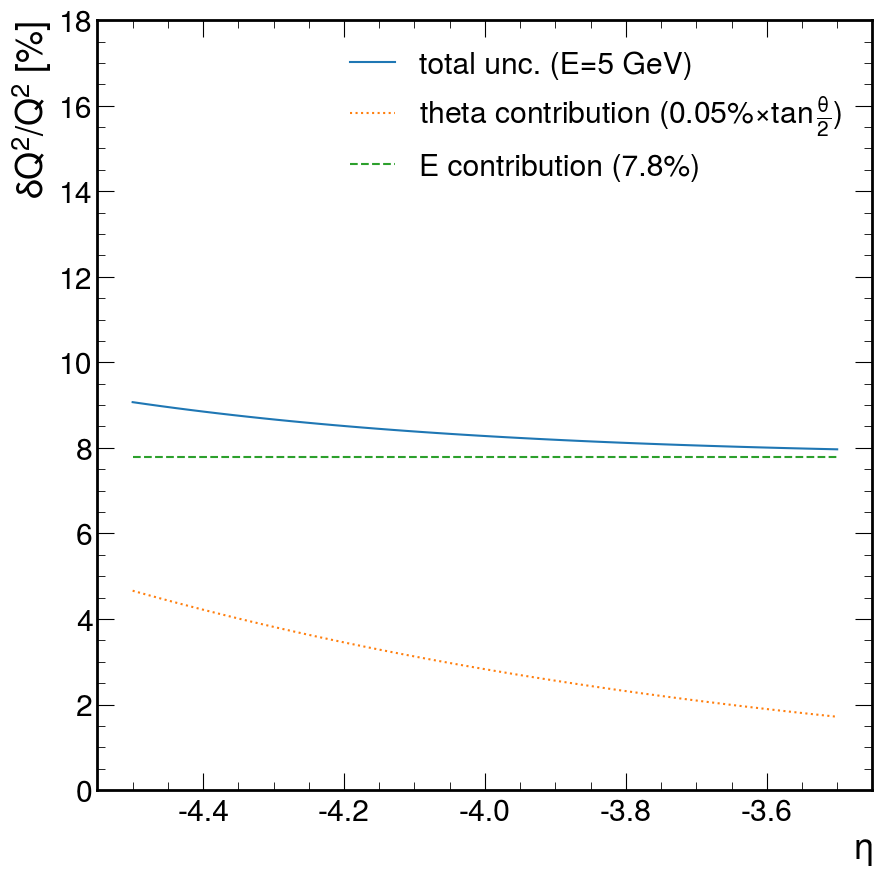

In [966]:


etas=np.linspace(-4.5, -3.5, 50)

for i in 2,:
    thetaresi=thetares[i]
    Eresfrac=Eresfracs[i]

    plt.plot(etas, 100*Q2resfrac(etas, Eresfrac,thetaresi), label="total unc. (E=5 GeV)")
    plt.plot(etas, 100*Q2resfrac(etas, 0,thetaresi), label=f"theta contribution ({100*thetaresi:.2f}%$\\times\\tan\\frac{{\\theta}}{{2}}$)", ls=':')
    plt.plot(etas, 100*Q2resfrac(etas, Eresfrac,0), label=f"E contribution ({100*Eresfrac:.1f}%)", ls='--')
    plt.xlabel("$\eta$")
    plt.ylabel("$\delta Q^2/Q^2$ [%]")
plt.ylim(0, 18)
plt.legend()
plt.savefig("images/Q2_res_slice_5GeV.pdf")
plt.show()

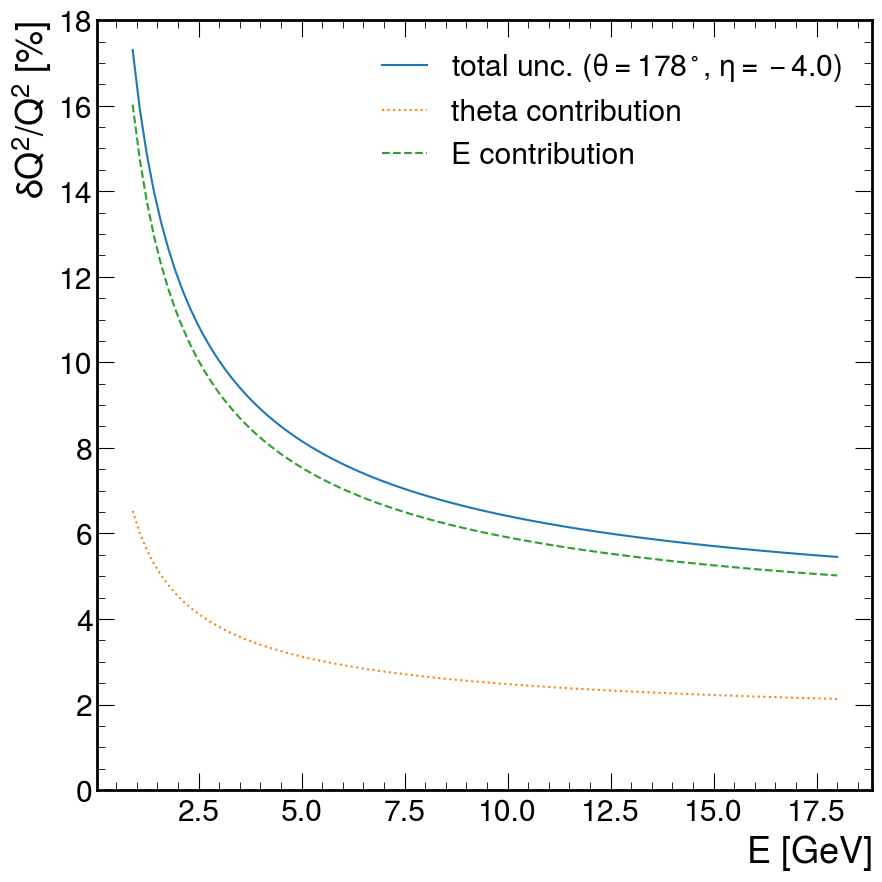

In [967]:
Es = np.linspace(0.9, 18, 100)

fnc=lambda x, a,b: np.hypot(a/np.sqrt(x), b)


thetaresi=fnc(Es, *coeff_th)
Eresfrac=fnc(Es, *coeff_E)

theta_deg=178
eta=get_eta(theta_deg/180*np.pi)

plt.plot(Es, 100*Q2resfrac(eta, Eresfrac,thetaresi), label=f"total unc. ($\\theta={theta_deg}^\\circ$, $\\eta={eta:.1f}$)")
plt.plot(Es, 100*Q2resfrac(eta, 0,thetaresi), label=f"theta contribution", ls=':')
plt.plot(Es, 100*Q2resfrac(eta, Eresfrac,0), label=f"E contribution", ls='--')
plt.xlabel("$E$ [GeV]")
plt.ylabel("$\delta Q^2/Q^2$ [%]")
plt.ylim(0,18)
plt.legend()
plt.savefig("images/Q2_res_slice_178deg.pdf")
plt.show()

# Theta vs E res, theta res, and Q^2 res

In [ ]:
def get_Eres(arrays, E=5):
    Esums={}
    fnc=gauss
    Esums[E]=[]
    for event in range(len(arrays)):
        Esum=np.sum(arrays['BackwardsEcalInsertHitsReco.energy'][event,:])
        #print(Esum)
        MC_E=np.sqrt(sum(arrays[f"MCParticles.momentum.{a}"][event,2]**2 for a in "xyz"))
        #print(MC_E)
        Esums[E].append(Esum)

    Esums[E]=np.array(Esums[E])
    sf=np.mean(Esums[E])/E
    print(f"sampling fraction={sf:.4f}")
    Ereco=Esums[E]/sf
    #print(Ereco)
    #print(sf)
    h,x=np.histogram(Ereco, bins=30 if E<5 else 50 if E<18 else 70, range=(0, 2*E))
    #print(h,x)
    bc=(x[1:]+x[:-1])/2
    p0=[10,np.mean(Ereco), np.std(Ereco)]

    slc=h>0
    coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                             sigma=np.sqrt(h[slc]))

    Eresfracs.append(coeff[2]/E)
    dEresfracs.append(np.sqrt(var_matrix[2][2])/E)

    chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
    ndof = len(bc[slc])-len(coeff)
    from scipy.stats import chi2 as c2
    print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")

spartitions=np.linspace(176, 178.6)
for i in range(len(partitions)-1):
    r= partitions[i:i+1]
    arrays[]
    

# now compare 0.5 and 0.9 cm versions:

In [757]:
def Eres(arrays, shift=0):
    Eresfracs=[]
    dEresfracs=[]
    energies=  0.9, 2, 5, 10, 18
    Esums={}
    for E in energies:

        fnc=gauss
        Esums[E]=[]
        for event in range(len(arrays[E])):
            Esum=np.sum(arrays[E]['BackwardsEcalInsertHitsReco.energy'][event,:])
            #print(Esum)
            MC_E=np.sqrt(sum(arrays[E][f"MCParticles.momentum.{a}"][event,2]**2 for a in "xyz"))
            #print(MC_E)
            Esums[E].append(Esum)

        Esums[E]=np.array(Esums[E])
        sf=np.mean(Esums[E])/E
        print(f"sampling fraction={sf:.4f}")
        Ereco=Esums[E]/sf
        #print(Ereco)
        #print(sf)
        h,x=np.histogram(Ereco, bins=30 if E<5 else 50 if E<18 else 70, range=(0, 2*E))
        #print(h,x)
        bc=(x[1:]+x[:-1])/2
        p0=[10,np.mean(Ereco), np.std(Ereco)]

        slc=h>0
        coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                 sigma=np.sqrt(h[slc]))

        Eresfracs.append(coeff[2]/E)
        dEresfracs.append(np.sqrt(var_matrix[2][2])/E)

        chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
        ndof = len(bc[slc])-len(coeff)
        from scipy.stats import chi2 as c2
        print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")

    Eresfracs=np.array(Eresfracs)
    dEresfracs=np.array(dEresfracs)
    return np.array(energies)+shift, Eresfracs*100, dEresfracs*100

In [773]:
def theta_res(arrays,shift=0):
    aa=[]
    for a in arrays[18]['BackwardsEcalInsertHitsReco.position.z']:
        aa+=list(a)
    zh=sorted(set(aa), reverse=True)[::2]

    energies= 0.9,2, 5, 10, 18
    thetares=[]
    dthetares=[]

    for E in energies:
        fnc=gauss
        dthetas=[]
        thetas=[]
        for event in range(len(arrays[E])):
            x=arrays[E]['BackwardsEcalInsertHitsReco.position.x'][event,:]
            y=arrays[E]['BackwardsEcalInsertHitsReco.position.y'][event,:]
            z=arrays[E]['BackwardsEcalInsertHitsReco.position.z'][event,:]
            Erecon=arrays[E]['BackwardsEcalInsertHitsReco.energy'][event,:]
            weights=Erecon

            isHLayer=np.array([z[i] in zh for i in range(len(z))])
            isVLayer=1-isHLayer

            #skip bad events (ie, ones where only V or only H layers are hit)
            if sum(Erecon*isVLayer) == 0 or sum(Erecon*isHLayer) == 0:
                continue

            x0=float(np.sum(x*Erecon*isVLayer)/np.sum(Erecon*isVLayer))
            y0=float(np.sum(y*Erecon*isHLayer)/np.sum(Erecon*isHLayer))
            #print(x0,y0)
            z0v=sum(z*Erecon*isVLayer)/np.sum(Erecon*isVLayer)
            z0h=sum(z*Erecon*isHLayer)/np.sum(Erecon*isHLayer)

            theta=np.pi-np.arctan(np.hypot(x0/z0v,y0/z0h))

            MC_x=arrays[E]["MCParticles.momentum.x"][event,2]
            MC_y=arrays[E]["MCParticles.momentum.y"][event,2]
            MC_z=arrays[E]["MCParticles.momentum.z"][event,2]
            MC_theta=np.arctan2(np.hypot(MC_x,MC_y),MC_z)
            #print(MC_x, MC_y, MC_z,MC_theta)
            dthetas.append(theta-MC_theta)
            thetas.append(theta)
        #print(thetas)    
        r=(np.pi-2.5*np.pi/180,np.pi-1.5*np.pi/180)
        h,x=np.histogram(thetas, bins=15 if E<5 else 30 if E<10 else 50, range=r)
        #print(h,x)
        bc=(x[1:]+x[:-1])/2
        p0=[10,np.pi-2*np.pi/180, np.std(thetas)]

        slc=h>0
        coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                 sigma=np.sqrt(h[slc]))
        print(180/np.pi*coeff[1])
        thetares.append(coeff[2])
        dthetares.append(np.sqrt(var_matrix[2][2]))

        #thetares.append(np.std(dthetas))
        #dthetares.append(np.std(dthetas)/np.sqrt(2*len(dthetas)))
    thetares=np.array(thetares)
    dthetares=np.array(dthetares)
    return np.array(energies)+shift,thetares*180/np.pi,dthetares*180/np.pi

{0.0, -126.0, 135.0, 9.0, 144.0, 18.0, -108.0, 27.0, 36.0, -90.0, 45.0, 180.0, 54.0, -72.0, 63.0, -63.0, 72.0, -54.0, 81.0, -45.0, 90.0, -36.0, 99.0, -27.0, 108.0, -18.0, 117.0, -9.0, -135.0}
{0.0, -125.0, -120.0, -115.0, -110.0, -105.0, -100.0, -95.0, -90.0, -85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -180.0, -50.0, -175.0, -45.0, -170.0, -165.0, -160.0, -30.0, -140.0, -135.0, -130.0}
sampling fraction=0.0330
chi2=13.130, ndof=11, pval=0.285
sampling fraction=0.0330
chi2=8.380, ndof=6, pval=0.212
sampling fraction=0.0328
chi2=10.868, ndof=9, pval=0.285
sampling fraction=0.0331
chi2=3.277, ndof=5, pval=0.657
sampling fraction=0.0332
chi2=10.266, ndof=5, pval=0.068
sampling fraction=0.0322
chi2=5.945, ndof=9, pval=0.745
sampling fraction=0.0335
chi2=7.862, ndof=5, pval=0.164
sampling fraction=0.0331
chi2=11.818, ndof=6, pval=0.0661
sampling fraction=0.0333
chi2=10.029, ndof=6, pval=0.123
sampling fraction=0.0328
chi2=10.152, ndof=5, pval=0.071
sampling fraction=0.0331
chi2=7.010, n

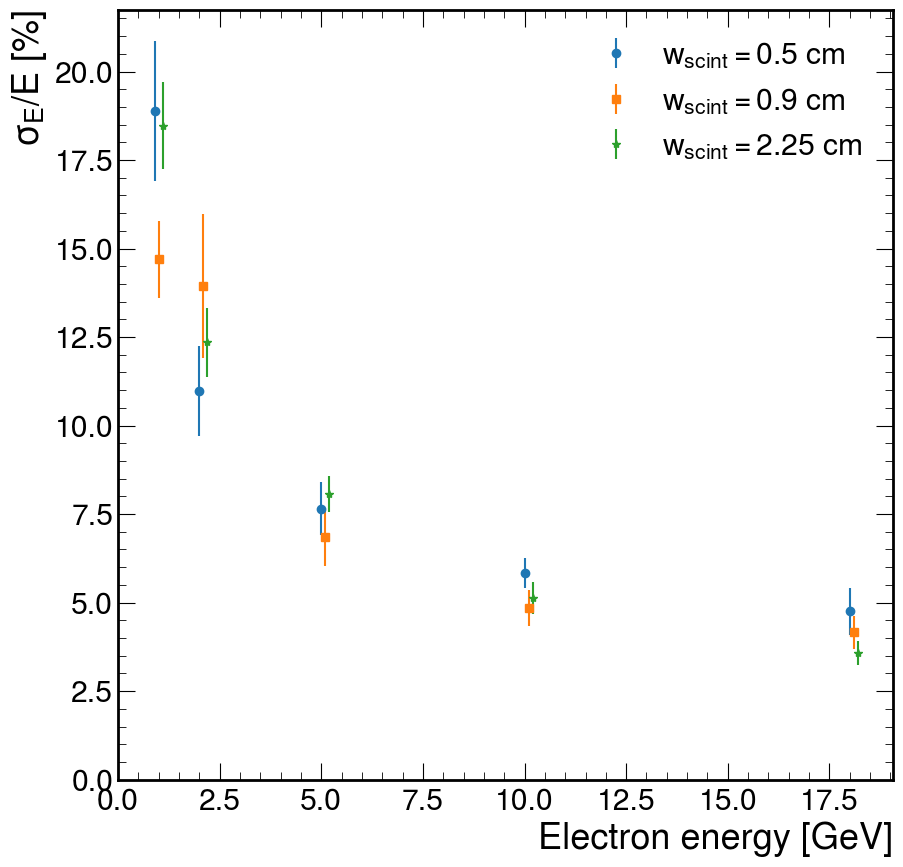

178.0068973481409
177.9976623008841
177.99558305553828
177.99972093837883
178.00134083664642
178.01027946679514
178.00587491687256
178.00920530654753
178.00779605459354
178.00871027885512
177.99430742270258
177.9912306748891
177.9820180710928
178.00352626865885
178.0090132173657


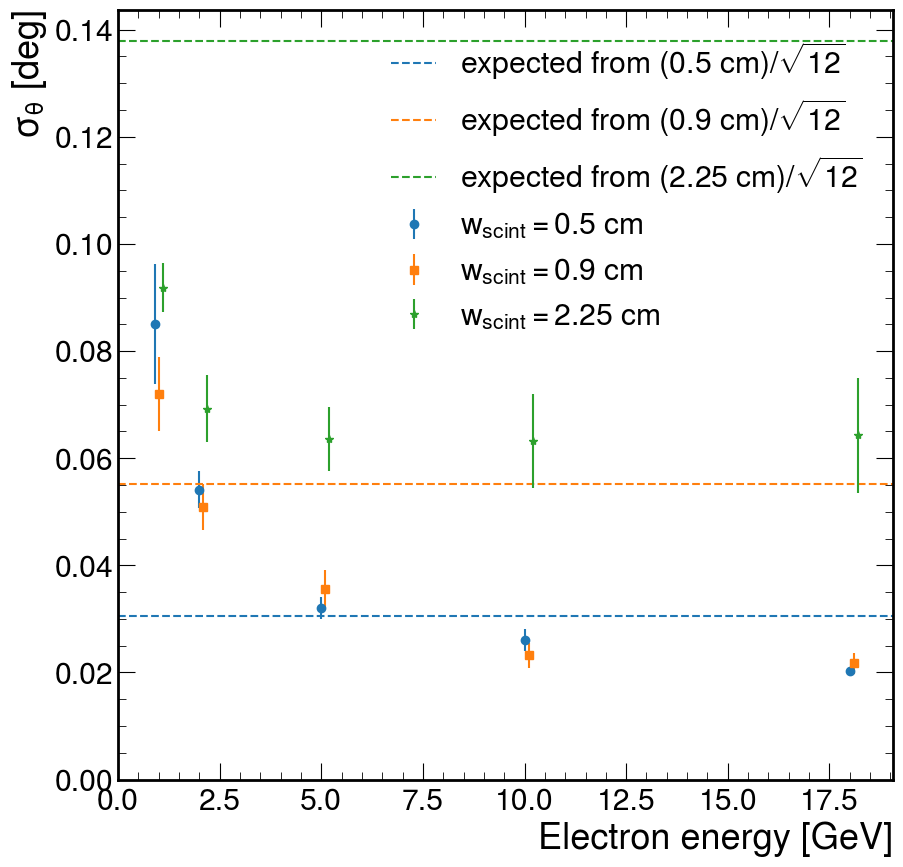

In [783]:
import uproot as ur
arrays_widths={}
for width in 0.9, 0.5, 2.25:
    arrays_widths[width]={}
    for E in 0.9, 2, 5, 10, 18:
        events = ur.open(f'{width}cm/insert_reco_e-_{E}GeV_theta_178-178deg.edm4hep.root:events')
        arrays_widths[width][E] = events.arrays()

print(set(arrays_widths[0.9][18]['BackwardsEcalInsertHitsReco.position.y'][0,:]))
print(set(arrays_widths[0.5][18]['BackwardsEcalInsertHitsReco.position.y'][0,:]))

widths=[0.5, 0.9, 2.25]
markers='os*'
for i in range(len(widths)):
    plt.errorbar(*Eres(arrays_widths[widths[i]], shift=0.1*i), label=f'$w_{{\\rm scint}}={widths[i]}$ cm', ls='', marker=markers[i])
plt.legend()
plt.ylabel("$\\sigma_E/E$ [%]")
plt.xlabel("Electron energy [GeV]")
plt.xlim(0)
plt.ylim(0)
plt.savefig("images/scint_width_vs_E_res.pdf")
plt.show()

for i in range(len(widths)):
    eb=plt.errorbar(*theta_res(arrays_widths[widths[i]], shift=0.1*i), label=f'$w_{{\\rm scint}}={widths[i]}$ cm', ls='', marker=markers[i])
    #calculate the expected resolution from sqrt(12)
    sqrt12res=(180/np.pi)*widths[i]/270/np.sqrt(12)
    plt.axhline(sqrt12res, color=eb[0].get_color(), label=f"expected from ({widths[i]} cm)/$\\sqrt{{12}}$", ls='--')
plt.legend()
plt.ylabel("$\\sigma_\\theta$ [deg]")
plt.xlabel("Electron energy [GeV]")
plt.xlim(0)
plt.ylim(0)
plt.savefig("images/scint_width_vs_theta_res.pdf")
plt.show()

In [911]:
events = ur.open(f'insert_reco_e-_18GeV_theta_180-180deg.edm4hep.root:events')
tmp= events.arrays()


In [912]:
len(tmp['BackwardsEcalInsertHitsReco.position.y'][0])

152

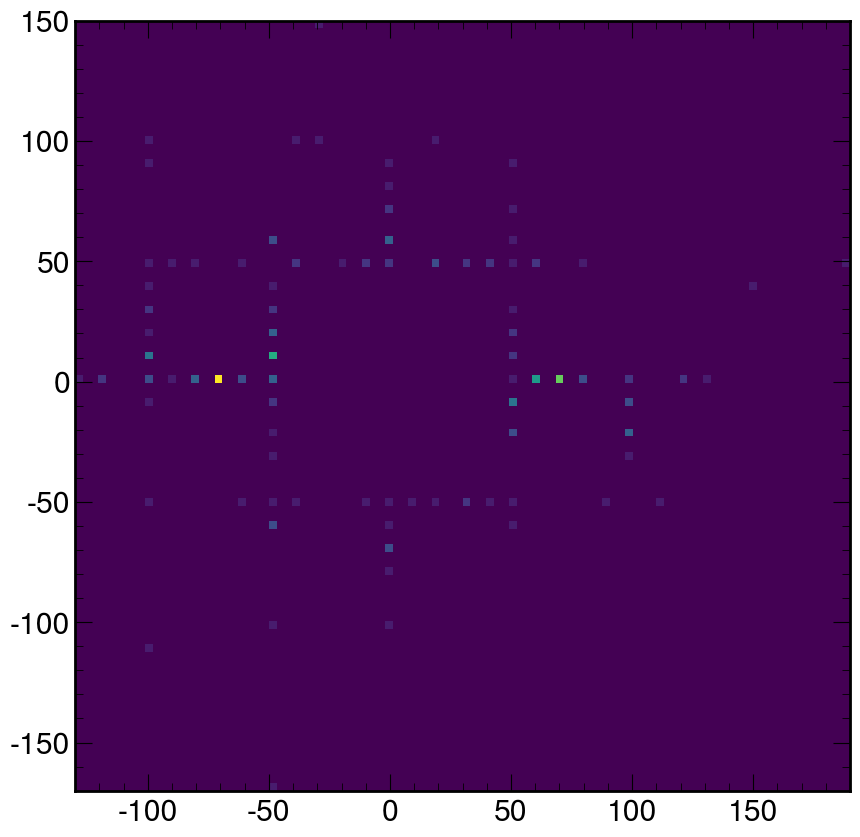

In [943]:
ys=[]
xs=[]
for i in range(500):
    ys+=list(arrays[(5,178.875)]['BackwardsEcalInsertHitsReco.position.y'][i,:])
    xs+=list(arrays[(5,178.875)]['BackwardsEcalInsertHitsReco.position.x'][i,:])
plt.hist2d(xs, ys, bins=100)
plt.show()